In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch . nn as nn
import torch . optim as optim
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [3]:
Train_data = pd.read_csv('train_Int_MM_PCA20.csv')
Validation_data = pd.read_csv('valid_Int_MM_PCA20.csv')
Test_data = pd.read_csv('test_Int_MM_PCA20.csv')
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PC1           12000 non-null  float64
 1   PC2           12000 non-null  float64
 2   PC3           12000 non-null  float64
 3   PC4           12000 non-null  float64
 4   PC5           12000 non-null  float64
 5   PC6           12000 non-null  float64
 6   PC7           12000 non-null  float64
 7   PC8           12000 non-null  float64
 8   PC9           12000 non-null  float64
 9   PC10          12000 non-null  float64
 10  PC11          12000 non-null  float64
 11  PC12          12000 non-null  float64
 12  PC13          12000 non-null  float64
 13  PC14          12000 non-null  float64
 14  PC15          12000 non-null  float64
 15  PC16          12000 non-null  float64
 16  PC17          12000 non-null  float64
 17  PC18          12000 non-null  float64
 18  PC19          12000 non-nu

In [4]:
Train_data.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,LoanApproved,RiskScore
0,-0.412651,0.084086,0.282528,-0.393400,-0.096727,0.393623,-0.103533,0.098367,-0.313214,-0.013962,...,0.161454,0.360753,0.129990,0.022559,0.161489,-0.091701,-0.072858,-0.079062,0,0.402174
1,-0.177765,0.031687,0.220899,0.010585,-0.042097,-0.534274,0.271388,0.394490,-0.065320,0.194361,...,0.154376,-0.110080,0.119097,-0.087204,-0.110624,-0.071684,-0.103167,-0.103785,0,0.384058
2,0.075380,-0.140120,-0.233582,0.085041,-0.253663,-0.209136,-0.191891,0.494238,-0.013998,-0.162744,...,-0.148155,-0.075608,0.089184,0.042354,0.169903,-0.103463,-0.177111,-0.164072,0,0.438406
3,0.598926,-0.203006,0.054247,-0.085631,0.062238,0.238745,-0.549751,-0.151796,0.010523,0.218145,...,-0.102736,-0.411824,-0.049605,0.387488,0.104552,-0.038672,-0.111568,-0.236795,1,0.086957
4,0.089788,-0.029256,0.082212,-0.036527,-0.274680,-0.538655,-0.136887,-0.148626,0.186360,-0.124184,...,-0.106489,0.006368,0.109195,-0.024542,0.136718,0.066475,-0.141779,0.117764,0,0.438406


In [5]:
X_training = Train_data.drop('LoanApproved',axis=1)
X_training = X_training.drop('RiskScore',axis=1)

y_training = Train_data['LoanApproved']

In [6]:
y_training.min()

0

In [7]:
X_validation = Validation_data.drop('LoanApproved',axis=1)
X_validation = X_validation.drop('RiskScore',axis=1)
y_validation = Validation_data['LoanApproved']

In [8]:
X_testing = Test_data.drop('LoanApproved',axis=1)
X_testing = X_testing.drop('RiskScore',axis=1)
y_testing = Test_data['LoanApproved']

In [9]:
class SingleLayer(nn.Module):
    def __init__(self, input_size, hidden1):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(input_size, hidden1),
        nn.Sigmoid(),
        nn.Linear(hidden1, 1),
        nn.Sigmoid()
        )
    def forward(self, x):
        return self.layers(x)

In [10]:
X_training = X_training.values
y_training = y_training.values
X_validation = X_validation.values
y_validation = y_validation.values
X_testing = X_testing.values
y_testing = y_testing.values

In [11]:
print(y_training)

[0 0 0 ... 1 0 0]


In [12]:
X_train, y_train = torch.tensor(X_training, dtype=torch.float32), torch.tensor(y_training, dtype=torch.float32).view(-1, 1)
X_val, y_val = torch.tensor(X_validation, dtype=torch.float32), torch.tensor(y_validation, dtype=torch.float32).view(-1, 1)
X_test, y_test = torch.tensor(X_testing, dtype=torch.float32), torch.tensor(y_testing, dtype=torch.float32).view(-1, 1)

In [13]:
print(X_training.shape)

(12000, 20)


Training Losses are 
          0
0  0.759508
1  0.757643
2  0.755788
3  0.753941
4  0.752104
Validation Data
Confusion Matrix for hidden layer 8
[[3043    1]
 [ 926   30]]
Accuracy: 0.7682, Precision: 0.9677, Recall: 0.0314, F1-score: 0.0608

Test Data
Confusion Matrix for hiden layer 8
[[3044    0]
 [ 921   35]]
Accuracy: 0.7698, Precision: 1.0000, Recall: 0.0366, F1-score: 0.0706



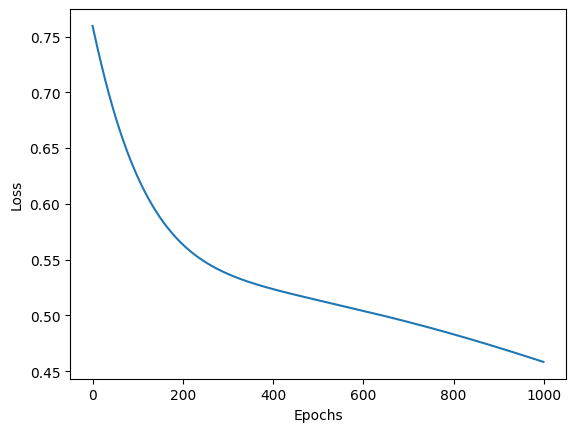

Training Losses are 
          0
0  0.694346
1  0.691816
2  0.689309
3  0.686823
4  0.684359
Validation Data
Confusion Matrix for hidden layer 16
[[2991   53]
 [ 631  325]]
Accuracy: 0.8290, Precision: 0.8598, Recall: 0.3400, F1-score: 0.4873

Test Data
Confusion Matrix for hiden layer 16
[[3002   42]
 [ 628  328]]
Accuracy: 0.8325, Precision: 0.8865, Recall: 0.3431, F1-score: 0.4947



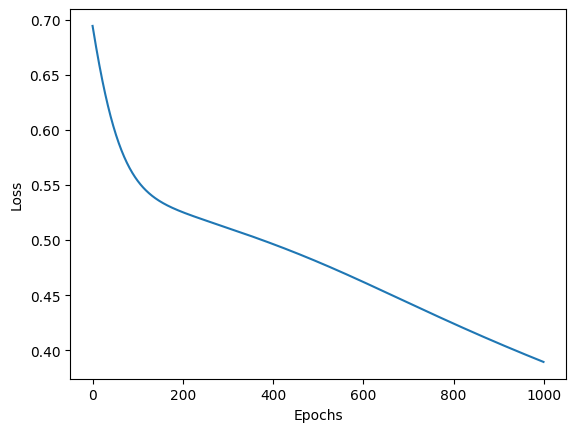

Training Losses are 
          0
0  0.673906
1  0.669439
2  0.665055
3  0.660755
4  0.656539
Validation Data
Confusion Matrix for hidden layer 32
[[2969   75]
 [ 491  465]]
Accuracy: 0.8585, Precision: 0.8611, Recall: 0.4864, F1-score: 0.6217

Test Data
Confusion Matrix for hiden layer 32
[[2965   79]
 [ 481  475]]
Accuracy: 0.8600, Precision: 0.8574, Recall: 0.4969, F1-score: 0.6291



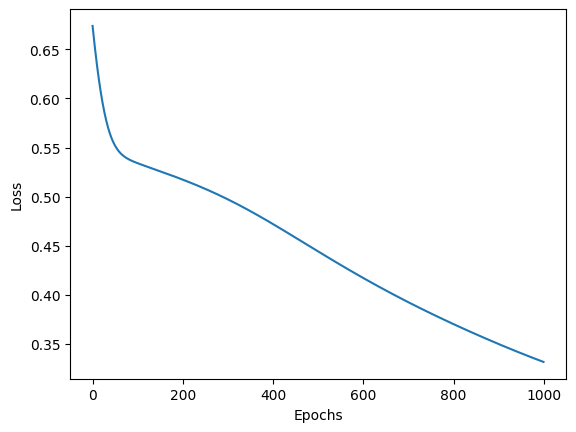

Training Losses are 
          0
0  0.737939
1  0.727786
2  0.717922
3  0.708354
4  0.699086
Validation Data
Confusion Matrix for hidden layer 64
[[2957   87]
 [ 418  538]]
Accuracy: 0.8738, Precision: 0.8608, Recall: 0.5628, F1-score: 0.6806

Test Data
Confusion Matrix for hiden layer 64
[[2947   97]
 [ 404  552]]
Accuracy: 0.8748, Precision: 0.8505, Recall: 0.5774, F1-score: 0.6879



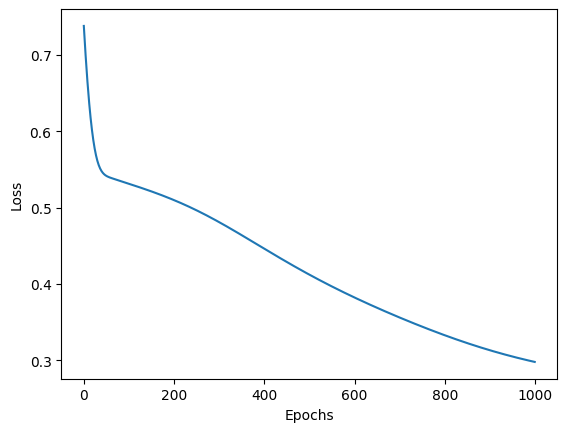

Training Losses are 
          0
0  0.708245
1  0.690222
2  0.673347
3  0.657634
4  0.643093
Validation Data
Confusion Matrix for hidden layer 128
[[2915  129]
 [ 351  605]]
Accuracy: 0.8800, Precision: 0.8243, Recall: 0.6328, F1-score: 0.7160

Test Data
Confusion Matrix for hiden layer 128
[[2892  152]
 [ 327  629]]
Accuracy: 0.8802, Precision: 0.8054, Recall: 0.6579, F1-score: 0.7242



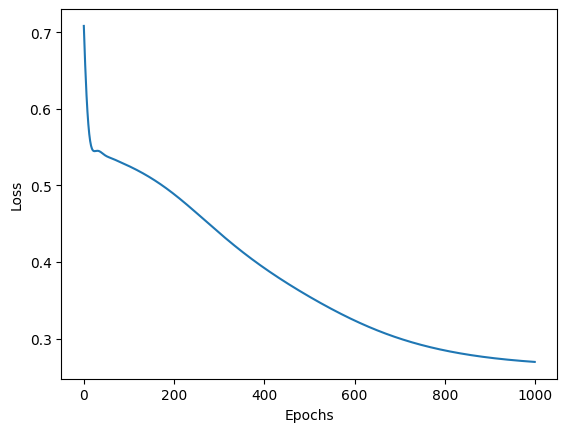

Best accuracy for test data is 0.88025 for degree 128


In [14]:
nuerons = [8,16,32,64,128]
min_loss_2 = 0
best_degree_2 = 1000
for nueron in nuerons:
  model = SingleLayer(20,nueron)
  criterion = nn.BCELoss() #Binary Classifiaction Loss
  optimizer = optim.Adam(model.parameters(), lr=0.001)
  epochs=1000
  loss_arr=[]
  for i in range(epochs):
        optimizer.zero_grad()
        model.train()
        outputs=model(X_train)
        outputs = outputs.view(-1, 1)
        loss = criterion(outputs, y_train.float())
        loss_arr.append(loss.detach().numpy())
        loss.backward()
        optimizer.step()
  print("Training Losses are ")
  loss_df = pd.DataFrame(loss_arr)
  print(loss_df.head())
  y_val_pred=model(X_val)
  y_val_pred=(y_val_pred>0.5).float()
  cm = confusion_matrix(y_val, y_val_pred)
  acc = accuracy_score(y_val, y_val_pred)
  precision = precision_score(y_val.numpy(), y_val_pred.numpy())
  recall = recall_score(y_val.numpy(), y_val_pred.numpy())
  f1 = f1_score(y_val.numpy(), y_val_pred.numpy())
  print("Validation Data")
  print(f"Confusion Matrix for hidden layer {nueron}")
  print(cm)
  print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
  y_test_pred=model(X_test)
  y_test_pred=(y_test_pred>0.5).float()
  cm = confusion_matrix(y_test, y_test_pred)
  acc = accuracy_score(y_test, y_test_pred)
  if acc > min_loss_2:
    min_loss_2 = acc
    best_degree_2 = nueron
  precision = precision_score(y_test.numpy(), y_test_pred.numpy())
  recall = recall_score(y_test.numpy(), y_test_pred.numpy())
  f1 = f1_score(y_test.numpy(), y_test_pred.numpy())
  print("Test Data")
  print(f"Confusion Matrix for hiden layer {nueron}")
  print(cm)
  print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
  plt.plot(range(epochs), loss_arr)
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.show()
print(f"Best accuracy for test data is {min_loss_2} for degree {best_degree_2}")
  #HARDWARE PROBELM MIGHT WORK BETTER WITH A GOOD HARDWARE

In [15]:
class DoubleLayer(nn.Module):
    def __init__(self, input_size, hidden1, hidden2):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(input_size, hidden1),
        nn.Sigmoid(),
        nn.Linear(hidden1, hidden2),
        nn.Sigmoid(),
        nn.Linear(hidden2, 1),
        nn.Sigmoid()
        )
    def forward(self, x):
        return self.layers(x)

Training Losses are 
          0
0  0.623790
1  0.622530
2  0.621282
3  0.620046
4  0.618821
Validation Data
Confusion Matrix for hidden layer 8 and 8
[[3041    3]
 [ 859   97]]
Accuracy: 0.7845, Precision: 0.9700, Recall: 0.1015, F1-score: 0.1837

Test Data
Confusion Matrix for hiden layer 8 and 8
[[3040    4]
 [ 839  117]]
Accuracy: 0.7893, Precision: 0.9669, Recall: 0.1224, F1-score: 0.2173



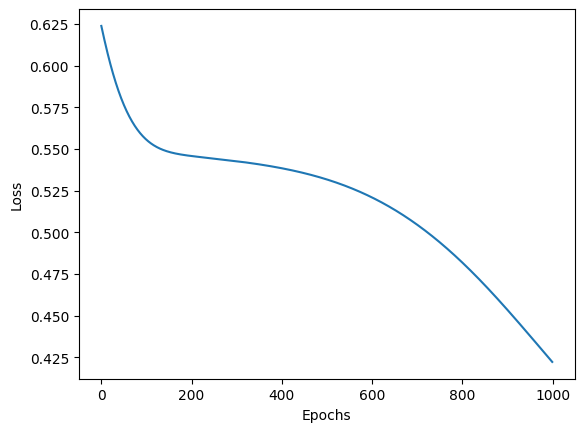

Training Losses are 
          0
0  0.721912
1  0.718614
2  0.715350
3  0.712120
4  0.708926
Validation Data
Confusion Matrix for hidden layer 8 and 16
[[3005   39]
 [ 677  279]]
Accuracy: 0.8210, Precision: 0.8774, Recall: 0.2918, F1-score: 0.4380

Test Data
Confusion Matrix for hiden layer 8 and 16
[[3011   33]
 [ 681  275]]
Accuracy: 0.8215, Precision: 0.8929, Recall: 0.2877, F1-score: 0.4351



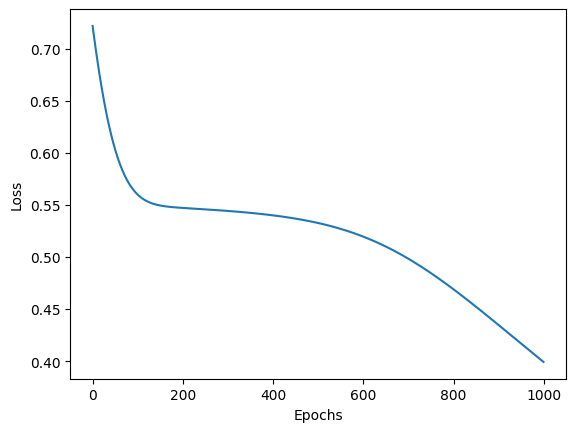

Training Losses are 
          0
0  0.661477
1  0.656930
2  0.652486
3  0.648146
4  0.643912
Validation Data
Confusion Matrix for hidden layer 8 and 32
[[2943  101]
 [ 421  535]]
Accuracy: 0.8695, Precision: 0.8412, Recall: 0.5596, F1-score: 0.6721

Test Data
Confusion Matrix for hiden layer 8 and 32
[[2937  107]
 [ 393  563]]
Accuracy: 0.8750, Precision: 0.8403, Recall: 0.5889, F1-score: 0.6925



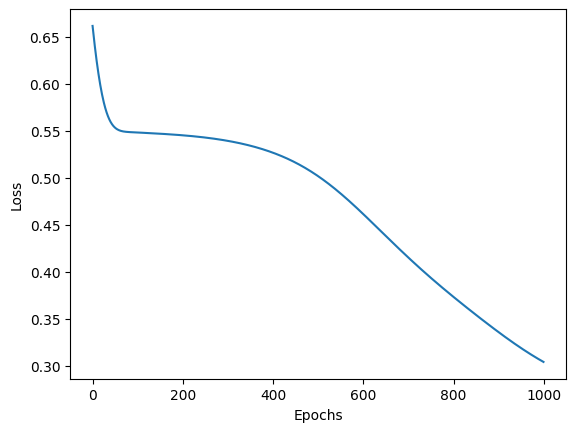

Training Losses are 
          0
0  0.817485
1  0.804219
2  0.791312
3  0.778771
4  0.766598
Validation Data
Confusion Matrix for hidden layer 8 and 64
[[2941  103]
 [ 402  554]]
Accuracy: 0.8738, Precision: 0.8432, Recall: 0.5795, F1-score: 0.6869

Test Data
Confusion Matrix for hiden layer 8 and 64
[[2928  116]
 [ 384  572]]
Accuracy: 0.8750, Precision: 0.8314, Recall: 0.5983, F1-score: 0.6959



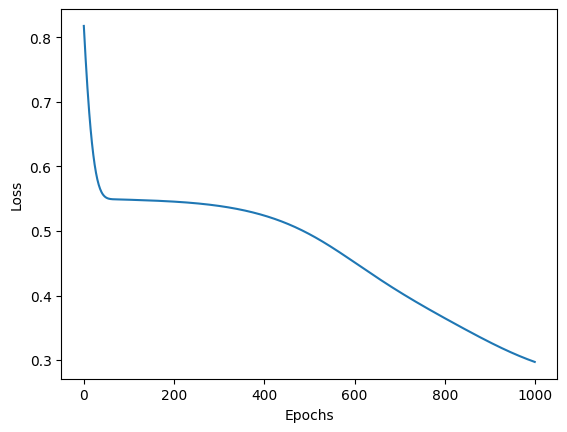

Training Losses are 
          0
0  0.698266
1  0.696097
2  0.693944
3  0.691809
4  0.689691
Validation Data
Confusion Matrix for hidden layer 16 and 8
[[3028   16]
 [ 739  217]]
Accuracy: 0.8113, Precision: 0.9313, Recall: 0.2270, F1-score: 0.3650

Test Data
Confusion Matrix for hiden layer 16 and 8
[[3026   18]
 [ 753  203]]
Accuracy: 0.8073, Precision: 0.9186, Recall: 0.2123, F1-score: 0.3449



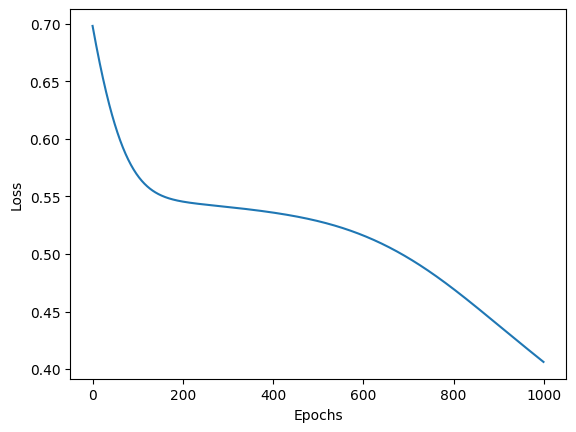

Training Losses are 
          0
0  0.598931
1  0.596871
2  0.594855
3  0.592886
4  0.590964
Validation Data
Confusion Matrix for hidden layer 16 and 16
[[2933  111]
 [ 383  573]]
Accuracy: 0.8765, Precision: 0.8377, Recall: 0.5994, F1-score: 0.6988

Test Data
Confusion Matrix for hiden layer 16 and 16
[[2917  127]
 [ 357  599]]
Accuracy: 0.8790, Precision: 0.8251, Recall: 0.6266, F1-score: 0.7122



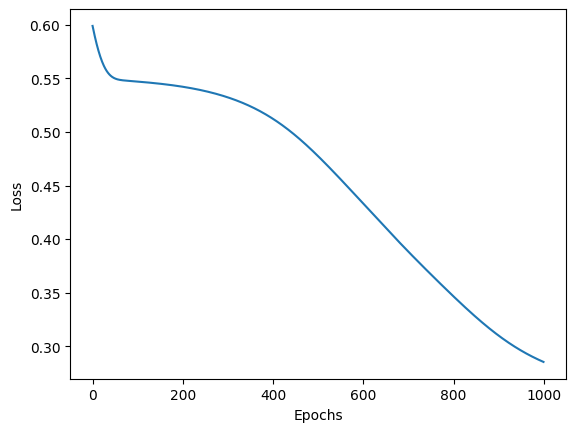

Training Losses are 
          0
0  0.633535
1  0.629062
2  0.624719
3  0.620506
4  0.616425
Validation Data
Confusion Matrix for hidden layer 16 and 32
[[2926  118]
 [ 370  586]]
Accuracy: 0.8780, Precision: 0.8324, Recall: 0.6130, F1-score: 0.7060

Test Data
Confusion Matrix for hiden layer 16 and 32
[[2907  137]
 [ 340  616]]
Accuracy: 0.8808, Precision: 0.8181, Recall: 0.6444, F1-score: 0.7209



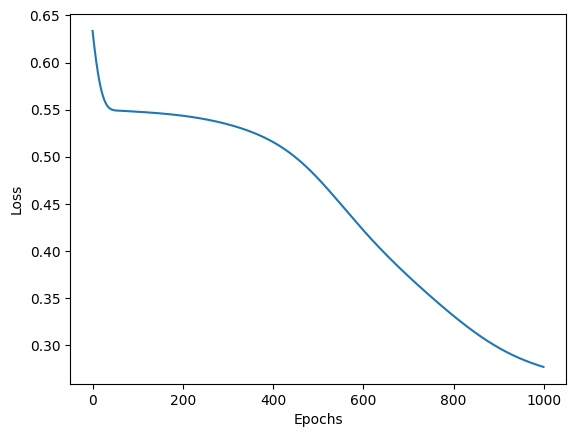

Training Losses are 
          0
0  0.713654
1  0.701873
2  0.690570
3  0.679752
4  0.669423
Validation Data
Confusion Matrix for hidden layer 16 and 64
[[2916  128]
 [ 351  605]]
Accuracy: 0.8802, Precision: 0.8254, Recall: 0.6328, F1-score: 0.7164

Test Data
Confusion Matrix for hiden layer 16 and 64
[[2895  149]
 [ 327  629]]
Accuracy: 0.8810, Precision: 0.8085, Recall: 0.6579, F1-score: 0.7255



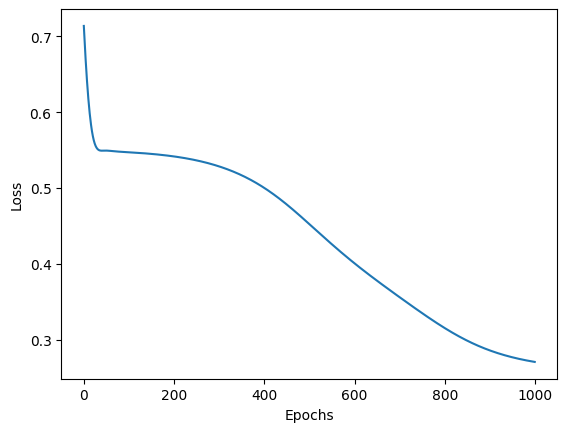

Training Losses are 
          0
0  0.774091
1  0.771007
2  0.767951
3  0.764924
4  0.761926
Validation Data
Confusion Matrix for hidden layer 32 and 8
[[2994   50]
 [ 617  339]]
Accuracy: 0.8333, Precision: 0.8715, Recall: 0.3546, F1-score: 0.5041

Test Data
Confusion Matrix for hiden layer 32 and 8
[[3000   44]
 [ 611  345]]
Accuracy: 0.8363, Precision: 0.8869, Recall: 0.3609, F1-score: 0.5130



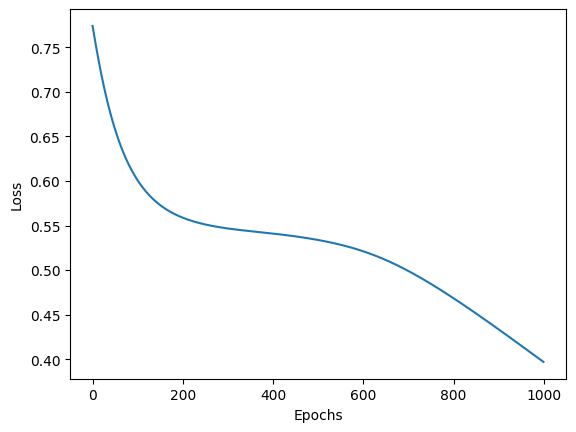

Training Losses are 
          0
0  0.711888
1  0.707111
2  0.702413
3  0.697795
4  0.693259
Validation Data
Confusion Matrix for hidden layer 32 and 16
[[2953   91]
 [ 448  508]]
Accuracy: 0.8652, Precision: 0.8481, Recall: 0.5314, F1-score: 0.6534

Test Data
Confusion Matrix for hiden layer 32 and 16
[[2942  102]
 [ 428  528]]
Accuracy: 0.8675, Precision: 0.8381, Recall: 0.5523, F1-score: 0.6658



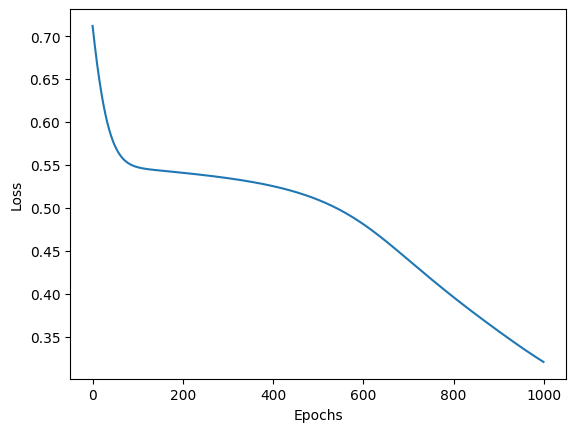

Training Losses are 
          0
0  0.609673
1  0.604975
2  0.600482
3  0.596197
4  0.592122
Validation Data
Confusion Matrix for hidden layer 32 and 32
[[2872  172]
 [ 312  644]]
Accuracy: 0.8790, Precision: 0.7892, Recall: 0.6736, F1-score: 0.7269

Test Data
Confusion Matrix for hiden layer 32 and 32
[[2850  194]
 [ 290  666]]
Accuracy: 0.8790, Precision: 0.7744, Recall: 0.6967, F1-score: 0.7335



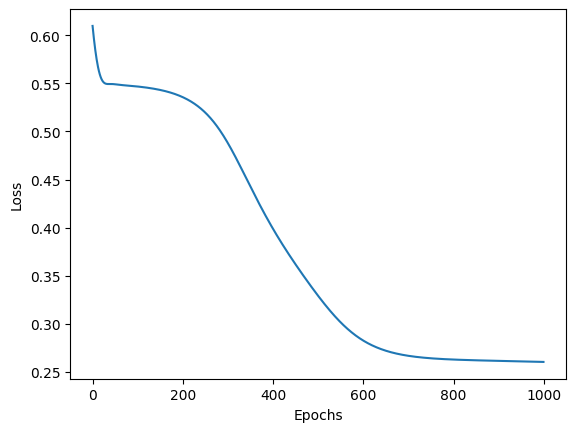

Training Losses are 
          0
0  0.743099
1  0.727910
2  0.713395
3  0.699564
4  0.686425
Validation Data
Confusion Matrix for hidden layer 32 and 64
[[2887  157]
 [ 318  638]]
Accuracy: 0.8812, Precision: 0.8025, Recall: 0.6674, F1-score: 0.7287

Test Data
Confusion Matrix for hiden layer 32 and 64
[[2862  182]
 [ 298  658]]
Accuracy: 0.8800, Precision: 0.7833, Recall: 0.6883, F1-score: 0.7327



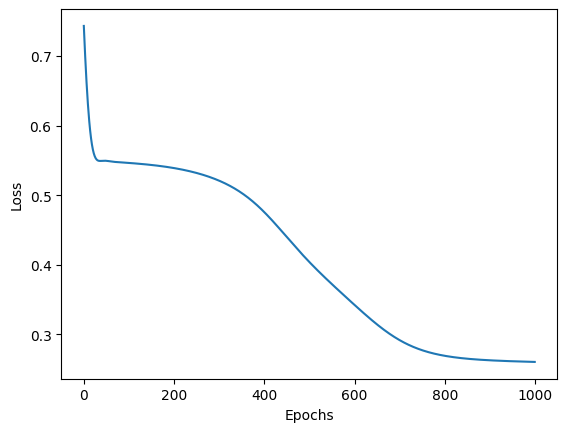

Training Losses are 
          0
0  0.763291
1  0.756515
2  0.749862
3  0.743335
4  0.736940
Validation Data
Confusion Matrix for hidden layer 64 and 8
[[2948   96]
 [ 407  549]]
Accuracy: 0.8742, Precision: 0.8512, Recall: 0.5743, F1-score: 0.6858

Test Data
Confusion Matrix for hiden layer 64 and 8
[[2939  105]
 [ 388  568]]
Accuracy: 0.8768, Precision: 0.8440, Recall: 0.5941, F1-score: 0.6974



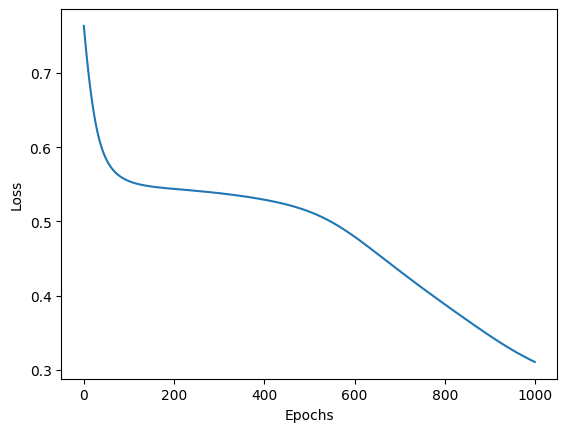

Training Losses are 
          0
0  0.730712
1  0.723943
2  0.717311
3  0.710821
4  0.704476
Validation Data
Confusion Matrix for hidden layer 64 and 16
[[2889  155]
 [ 321  635]]
Accuracy: 0.8810, Precision: 0.8038, Recall: 0.6642, F1-score: 0.7274

Test Data
Confusion Matrix for hiden layer 64 and 16
[[2860  184]
 [ 296  660]]
Accuracy: 0.8800, Precision: 0.7820, Recall: 0.6904, F1-score: 0.7333



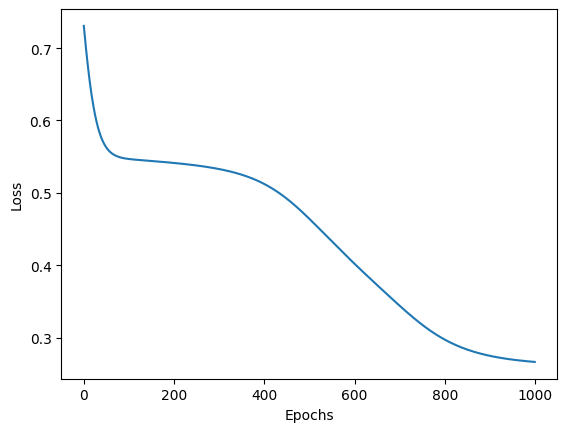

Training Losses are 
          0
0  0.599312
1  0.593618
2  0.588293
3  0.583341
4  0.578766
Validation Data
Confusion Matrix for hidden layer 64 and 32
[[2867  177]
 [ 311  645]]
Accuracy: 0.8780, Precision: 0.7847, Recall: 0.6747, F1-score: 0.7255

Test Data
Confusion Matrix for hiden layer 64 and 32
[[2852  192]
 [ 292  664]]
Accuracy: 0.8790, Precision: 0.7757, Recall: 0.6946, F1-score: 0.7329



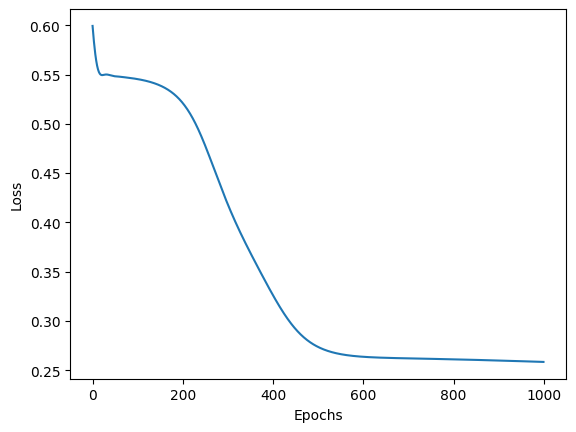

Training Losses are 
          0
0  0.687054
1  0.671434
2  0.656842
3  0.643290
4  0.630781
Validation Data
Confusion Matrix for hidden layer 64 and 64
[[2866  178]
 [ 314  642]]
Accuracy: 0.8770, Precision: 0.7829, Recall: 0.6715, F1-score: 0.7230

Test Data
Confusion Matrix for hiden layer 64 and 64
[[2848  196]
 [ 291  665]]
Accuracy: 0.8782, Precision: 0.7724, Recall: 0.6956, F1-score: 0.7320



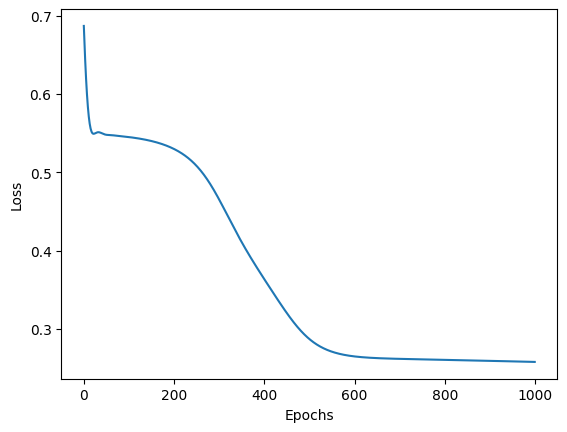

Best accuracy for test data is 0.881 for degree 16 & 64


In [16]:
nuerons = [8,16,32,64]
best_degree_3=0
best_accuracy_2=0
layer_abc=0
for nueron in nuerons:
  for double_nueron in nuerons:
    model = DoubleLayer(20,nueron,double_nueron)
    criterion = nn.BCELoss() #Binary Classifiaction Loss
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    epochs=1000
    loss_arr=[]
    for i in range(epochs):
          optimizer.zero_grad()
          model.train()
          outputs=model(X_train)
          outputs = outputs.view(-1, 1)
          loss = criterion(outputs, y_train.float())
          loss_arr.append(loss.detach().numpy())
          loss.backward()
          optimizer.step()
    print("Training Losses are ")
    loss_df = pd.DataFrame(loss_arr)
    print(loss_df.head())
    y_val_pred=model(X_val)
    y_val_pred=(y_val_pred>0.5).float()
    cm = confusion_matrix(y_val, y_val_pred)
    acc = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val.numpy(), y_val_pred.numpy())
    recall = recall_score(y_val.numpy(), y_val_pred.numpy())
    f1 = f1_score(y_val.numpy(), y_val_pred.numpy())
    print("Validation Data")
    print(f"Confusion Matrix for hidden layer {nueron} and {double_nueron}")
    print(cm)
    print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
    y_test_pred=model(X_test)
    y_test_pred=(y_test_pred>0.5).float()
    cm = confusion_matrix(y_test, y_test_pred)
    acc = accuracy_score(y_test, y_test_pred)
    if acc > best_accuracy_2:
          best_accuracy_2=acc
          best_degree_4=nueron
          layer_abc = double_nueron
    precision = precision_score(y_test.numpy(), y_test_pred.numpy())
    recall = recall_score(y_test.numpy(), y_test_pred.numpy())
    f1 = f1_score(y_test.numpy(), y_test_pred.numpy())
    print("Test Data")
    print(f"Confusion Matrix for hiden layer {nueron} and {double_nueron}")
    print(cm)
    print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
    plt.plot(range(epochs), loss_arr)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
print(f"Best accuracy for test data is {best_accuracy_2} for degree {best_degree_4} & {layer_abc}")

In [17]:
class TripleLayer(nn.Module):
    def __init__(self, input_size, hidden1, hidden2,hidden3):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(input_size, hidden1),
        nn.Sigmoid(),
        nn.Linear(hidden1, hidden2),
        nn.Sigmoid(),
        nn.Linear(hidden2, hidden3),
        nn.Sigmoid(),
        nn.Linear(hidden3, 1),
        nn.Sigmoid()
        )
    def forward(self, x):
        return self.layers(x)

Training Losses are 
          0
0  0.673808
1  0.672034
2  0.670276
3  0.668533
4  0.666806
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 8
[[3043    1]
 [ 895   61]]
Accuracy: 0.7760, Precision: 0.9839, Recall: 0.0638, F1-score: 0.1198

Test Data
Confusion Matrix for hiden layer 8 and 8 and 8
[[3043    1]
 [ 882   74]]
Accuracy: 0.7792, Precision: 0.9867, Recall: 0.0774, F1-score: 0.1435



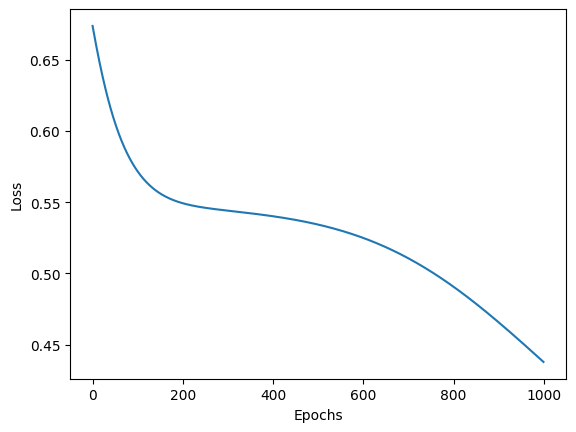

Training Losses are 
          0
0  0.711936
1  0.710102
2  0.708280
3  0.706469
4  0.704669
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 8 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


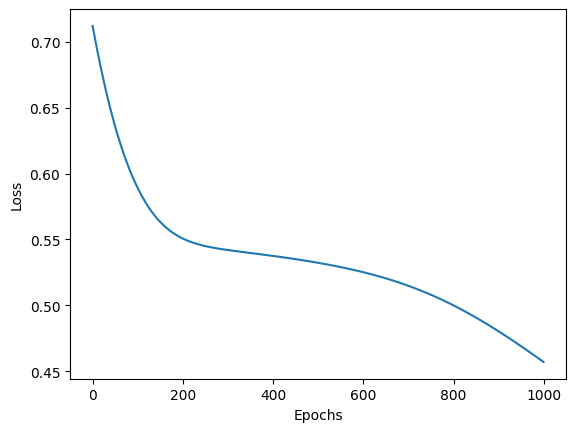

Training Losses are 
          0
0  0.656787
1  0.655223
2  0.653671
3  0.652132
4  0.650605
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 32
[[3043    1]
 [ 918   38]]
Accuracy: 0.7702, Precision: 0.9744, Recall: 0.0397, F1-score: 0.0764

Test Data
Confusion Matrix for hiden layer 8 and 8 and 32
[[3044    0]
 [ 914   42]]
Accuracy: 0.7715, Precision: 1.0000, Recall: 0.0439, F1-score: 0.0842



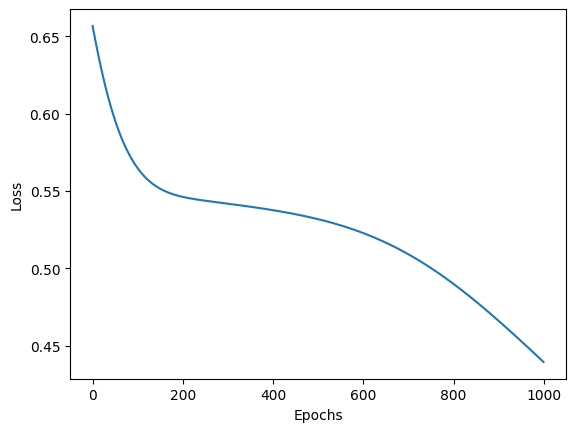

Training Losses are 
          0
0  0.570597
1  0.569941
2  0.569295
3  0.568661
4  0.568037
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 64
[[2987   57]
 [ 501  455]]
Accuracy: 0.8605, Precision: 0.8887, Recall: 0.4759, F1-score: 0.6199

Test Data
Confusion Matrix for hiden layer 8 and 8 and 64
[[2970   74]
 [ 489  467]]
Accuracy: 0.8592, Precision: 0.8632, Recall: 0.4885, F1-score: 0.6239



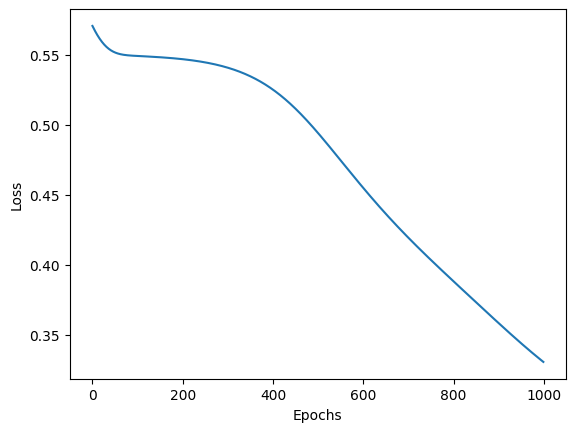

Training Losses are 
          0
0  0.672204
1  0.669400
2  0.666633
3  0.663903
4  0.661210
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 8
[[3015   29]
 [ 718  238]]
Accuracy: 0.8133, Precision: 0.8914, Recall: 0.2490, F1-score: 0.3892

Test Data
Confusion Matrix for hiden layer 8 and 16 and 8
[[3017   27]
 [ 722  234]]
Accuracy: 0.8127, Precision: 0.8966, Recall: 0.2448, F1-score: 0.3846



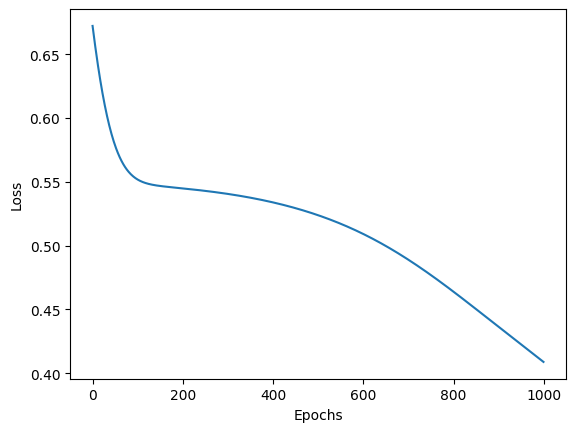

Training Losses are 
          0
0  0.872392
1  0.867615
2  0.862879
3  0.858185
4  0.853531
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 16 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


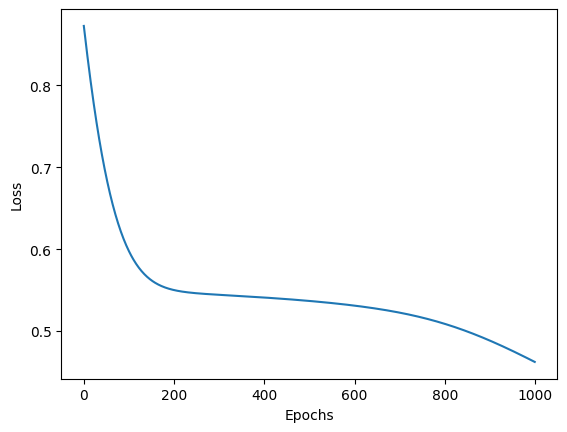

Training Losses are 
          0
0  0.786391
1  0.782514
2  0.778673
3  0.774870
4  0.771104
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 32
[[3036    8]
 [ 803  153]]
Accuracy: 0.7973, Precision: 0.9503, Recall: 0.1600, F1-score: 0.2739

Test Data
Confusion Matrix for hiden layer 8 and 16 and 32
[[3029   15]
 [ 800  156]]
Accuracy: 0.7963, Precision: 0.9123, Recall: 0.1632, F1-score: 0.2768



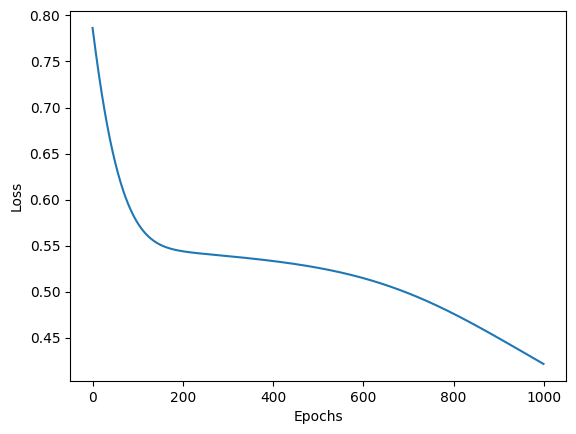

Training Losses are 
          0
0  0.630426
1  0.628290
2  0.626183
3  0.624107
4  0.622062
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 64
[[2960   84]
 [ 499  457]]
Accuracy: 0.8542, Precision: 0.8447, Recall: 0.4780, F1-score: 0.6106

Test Data
Confusion Matrix for hiden layer 8 and 16 and 64
[[2958   86]
 [ 479  477]]
Accuracy: 0.8588, Precision: 0.8472, Recall: 0.4990, F1-score: 0.6280



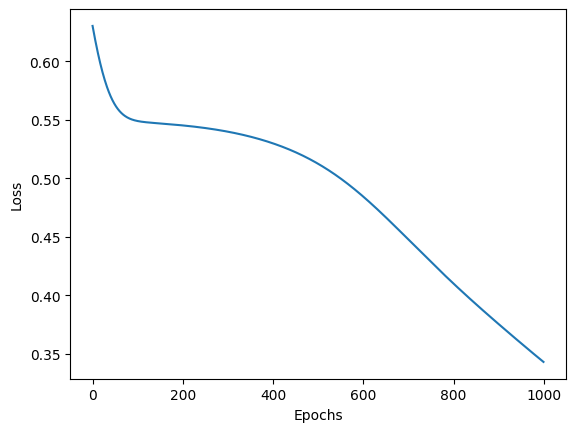

Training Losses are 
          0
0  0.723900
1  0.718262
2  0.712723
3  0.707283
4  0.701946
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 8
[[2942  102]
 [ 446  510]]
Accuracy: 0.8630, Precision: 0.8333, Recall: 0.5335, F1-score: 0.6505

Test Data
Confusion Matrix for hiden layer 8 and 32 and 8
[[2934  110]
 [ 419  537]]
Accuracy: 0.8678, Precision: 0.8300, Recall: 0.5617, F1-score: 0.6700



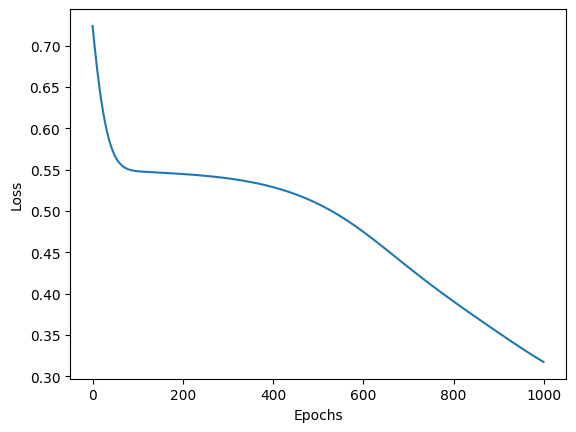

Training Losses are 
          0
0  0.851175
1  0.843415
2  0.835766
3  0.828228
4  0.820802
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 16
[[2963   81]
 [ 575  381]]
Accuracy: 0.8360, Precision: 0.8247, Recall: 0.3985, F1-score: 0.5374

Test Data
Confusion Matrix for hiden layer 8 and 32 and 16
[[2966   78]
 [ 572  384]]
Accuracy: 0.8375, Precision: 0.8312, Recall: 0.4017, F1-score: 0.5416



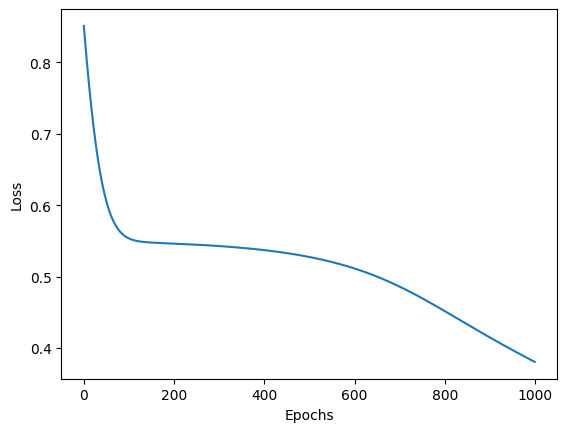

Training Losses are 
          0
0  0.693950
1  0.688907
2  0.683959
3  0.679108
4  0.674356
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 32
[[2943  101]
 [ 413  543]]
Accuracy: 0.8715, Precision: 0.8432, Recall: 0.5680, F1-score: 0.6787

Test Data
Confusion Matrix for hiden layer 8 and 32 and 32
[[2933  111]
 [ 393  563]]
Accuracy: 0.8740, Precision: 0.8353, Recall: 0.5889, F1-score: 0.6908



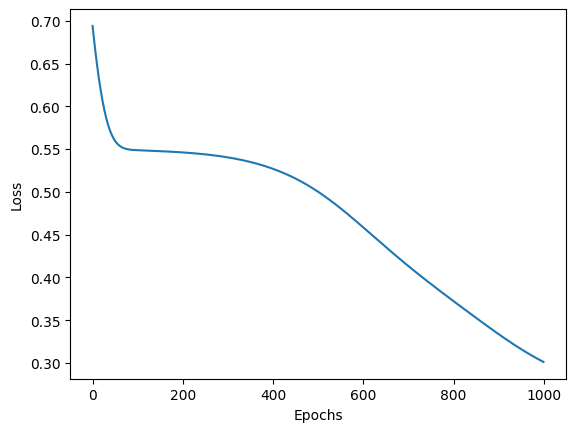

Training Losses are 
          0
0  0.714662
1  0.708880
2  0.703205
3  0.697639
4  0.692186
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 64
[[2949   95]
 [ 412  544]]
Accuracy: 0.8732, Precision: 0.8513, Recall: 0.5690, F1-score: 0.6821

Test Data
Confusion Matrix for hiden layer 8 and 32 and 64
[[2937  107]
 [ 393  563]]
Accuracy: 0.8750, Precision: 0.8403, Recall: 0.5889, F1-score: 0.6925



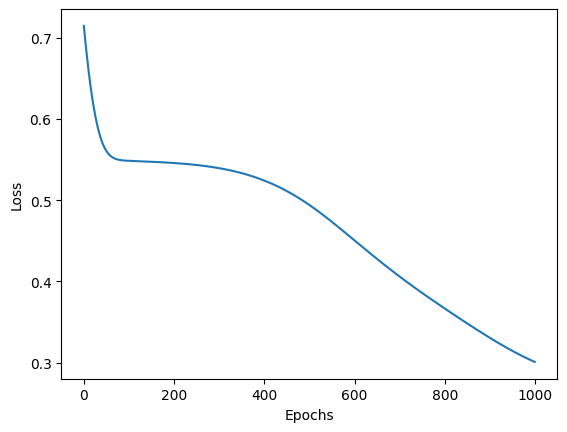

Training Losses are 
          0
0  0.692589
1  0.682894
2  0.673573
3  0.664630
4  0.656068
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 8
[[2911  133]
 [ 343  613]]
Accuracy: 0.8810, Precision: 0.8217, Recall: 0.6412, F1-score: 0.7203

Test Data
Confusion Matrix for hiden layer 8 and 64 and 8
[[2889  155]
 [ 325  631]]
Accuracy: 0.8800, Precision: 0.8028, Recall: 0.6600, F1-score: 0.7245



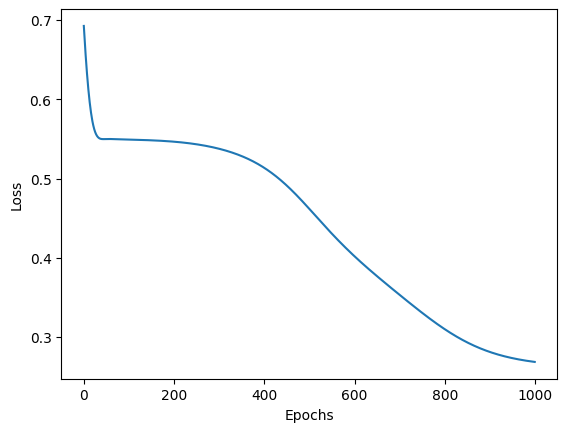

Training Losses are 
          0
0  0.706165
1  0.695908
2  0.686028
3  0.676529
4  0.667416
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 16
[[2925  119]
 [ 365  591]]
Accuracy: 0.8790, Precision: 0.8324, Recall: 0.6182, F1-score: 0.7095

Test Data
Confusion Matrix for hiden layer 8 and 64 and 16
[[2904  140]
 [ 338  618]]
Accuracy: 0.8805, Precision: 0.8153, Recall: 0.6464, F1-score: 0.7211



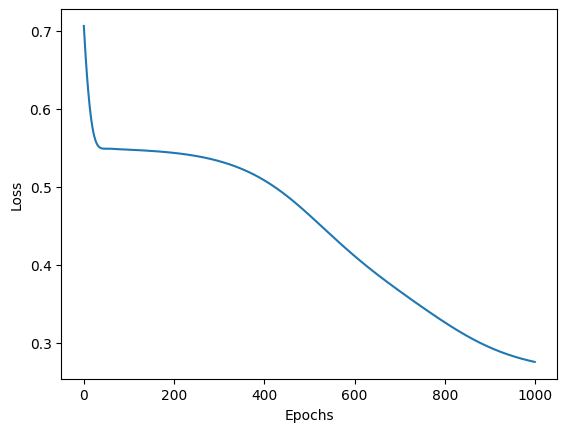

Training Losses are 
          0
0  0.829960
1  0.816338
2  0.803067
3  0.790153
4  0.777605
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 32
[[2940  104]
 [ 430  526]]
Accuracy: 0.8665, Precision: 0.8349, Recall: 0.5502, F1-score: 0.6633

Test Data
Confusion Matrix for hiden layer 8 and 64 and 32
[[2937  107]
 [ 401  555]]
Accuracy: 0.8730, Precision: 0.8384, Recall: 0.5805, F1-score: 0.6860



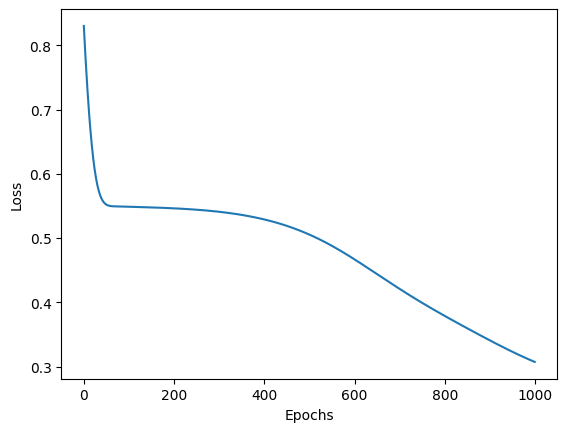

Training Losses are 
          0
0  0.803873
1  0.790013
2  0.776566
3  0.763540
4  0.750943
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 64
[[2951   93]
 [ 466  490]]
Accuracy: 0.8602, Precision: 0.8405, Recall: 0.5126, F1-score: 0.6368

Test Data
Confusion Matrix for hiden layer 8 and 64 and 64
[[2937  107]
 [ 439  517]]
Accuracy: 0.8635, Precision: 0.8285, Recall: 0.5408, F1-score: 0.6544



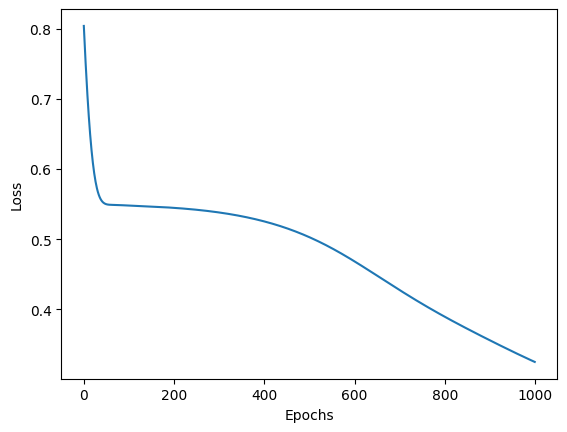

Training Losses are 
          0
0  0.686554
1  0.684316
2  0.682093
3  0.679886
4  0.677693
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 8
[[2984   60]
 [ 604  352]]
Accuracy: 0.8340, Precision: 0.8544, Recall: 0.3682, F1-score: 0.5146

Test Data
Confusion Matrix for hiden layer 16 and 8 and 8
[[2996   48]
 [ 591  365]]
Accuracy: 0.8403, Precision: 0.8838, Recall: 0.3818, F1-score: 0.5332



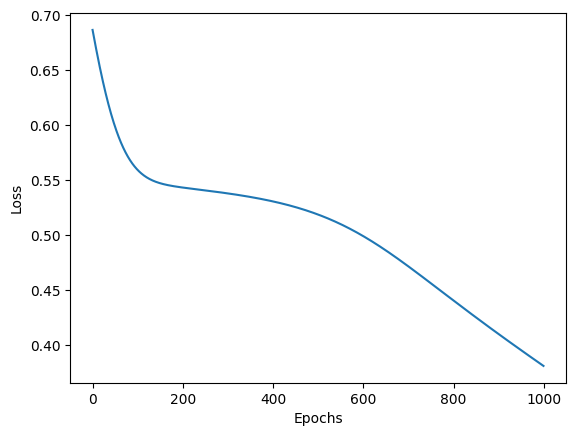

Training Losses are 
          0
0  0.751267
1  0.748803
2  0.746364
3  0.743951
4  0.741563
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 16
[[3044    0]
 [ 921   35]]
Accuracy: 0.7698, Precision: 1.0000, Recall: 0.0366, F1-score: 0.0706

Test Data
Confusion Matrix for hiden layer 16 and 8 and 16
[[3044    0]
 [ 915   41]]
Accuracy: 0.7712, Precision: 1.0000, Recall: 0.0429, F1-score: 0.0822



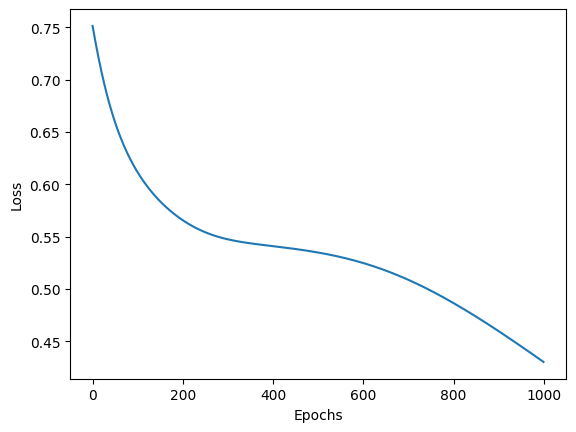

Training Losses are 
          0
0  0.626381
1  0.624821
2  0.623278
3  0.621754
4  0.620246
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 32
[[2966   78]
 [ 509  447]]
Accuracy: 0.8532, Precision: 0.8514, Recall: 0.4676, F1-score: 0.6036

Test Data
Confusion Matrix for hiden layer 16 and 8 and 32
[[2967   77]
 [ 493  463]]
Accuracy: 0.8575, Precision: 0.8574, Recall: 0.4843, F1-score: 0.6190



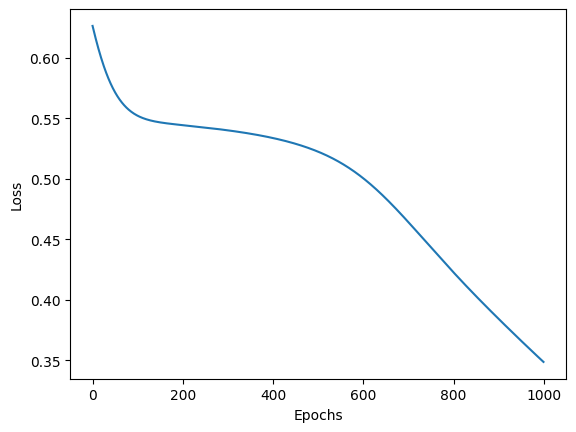

Training Losses are 
          0
0  0.695972
1  0.693883
2  0.691811
3  0.689755
4  0.687716
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 64
[[3015   29]
 [ 677  279]]
Accuracy: 0.8235, Precision: 0.9058, Recall: 0.2918, F1-score: 0.4415

Test Data
Confusion Matrix for hiden layer 16 and 8 and 64
[[3020   24]
 [ 685  271]]
Accuracy: 0.8227, Precision: 0.9186, Recall: 0.2835, F1-score: 0.4333



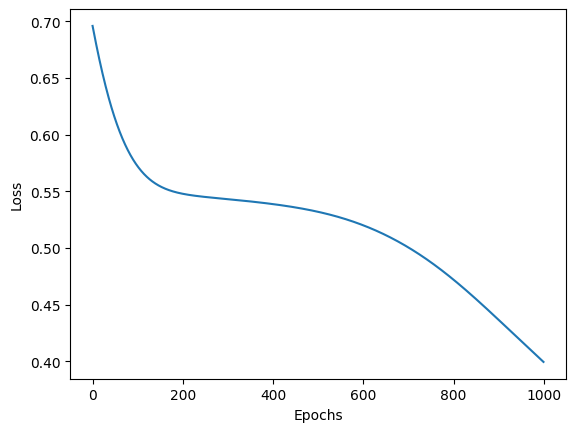

Training Losses are 
          0
0  0.685551
1  0.682047
2  0.678591
3  0.675183
4  0.671824
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 8
[[2965   79]
 [ 525  431]]
Accuracy: 0.8490, Precision: 0.8451, Recall: 0.4508, F1-score: 0.5880

Test Data
Confusion Matrix for hiden layer 16 and 16 and 8
[[2965   79]
 [ 510  446]]
Accuracy: 0.8528, Precision: 0.8495, Recall: 0.4665, F1-score: 0.6023



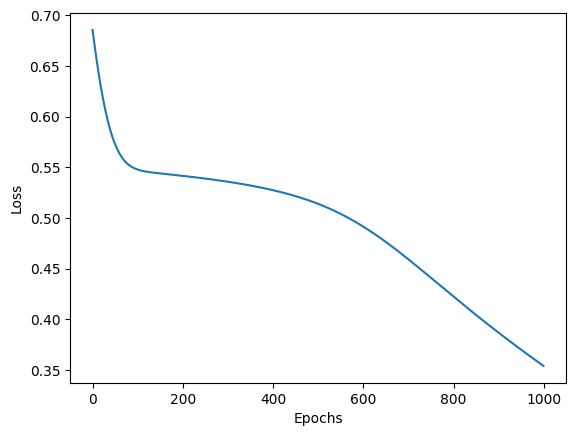

Training Losses are 
          0
0  0.635507
1  0.632993
2  0.630520
3  0.628089
4  0.625699
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 16
[[2934  110]
 [ 385  571]]
Accuracy: 0.8762, Precision: 0.8385, Recall: 0.5973, F1-score: 0.6976

Test Data
Confusion Matrix for hiden layer 16 and 16 and 16
[[2918  126]
 [ 362  594]]
Accuracy: 0.8780, Precision: 0.8250, Recall: 0.6213, F1-score: 0.7088



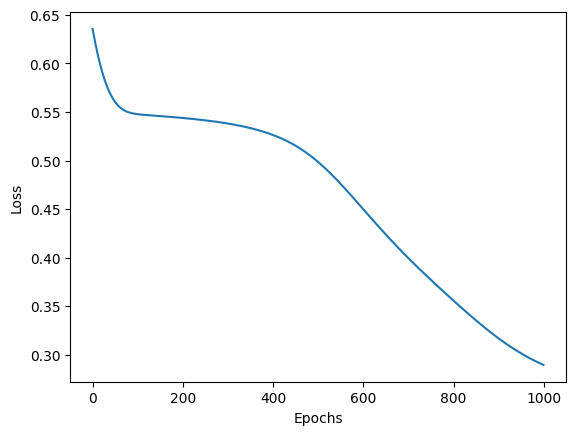

Training Losses are 
          0
0  0.582520
1  0.580973
2  0.579460
3  0.577983
4  0.576542
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 32
[[2906  138]
 [ 335  621]]
Accuracy: 0.8818, Precision: 0.8182, Recall: 0.6496, F1-score: 0.7242

Test Data
Confusion Matrix for hiden layer 16 and 16 and 32
[[2878  166]
 [ 316  640]]
Accuracy: 0.8795, Precision: 0.7940, Recall: 0.6695, F1-score: 0.7264



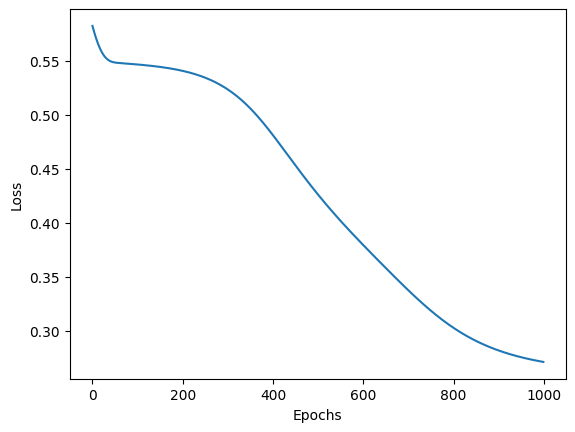

Training Losses are 
          0
0  0.657559
1  0.654725
2  0.651937
3  0.649194
4  0.646498
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 64
[[2957   87]
 [ 464  492]]
Accuracy: 0.8622, Precision: 0.8497, Recall: 0.5146, F1-score: 0.6410

Test Data
Confusion Matrix for hiden layer 16 and 16 and 64
[[2949   95]
 [ 436  520]]
Accuracy: 0.8672, Precision: 0.8455, Recall: 0.5439, F1-score: 0.6620



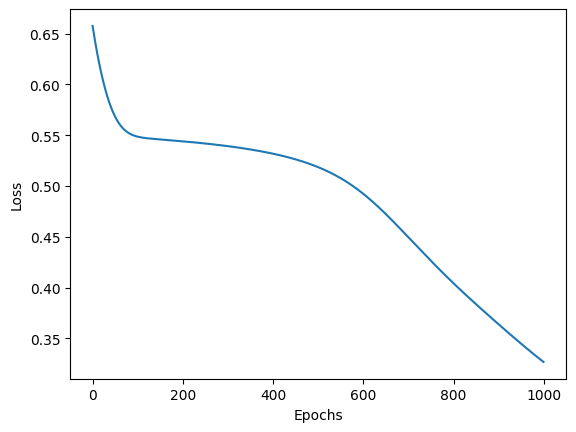

Training Losses are 
          0
0  0.773839
1  0.766236
2  0.758778
3  0.751465
4  0.744298
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 8
[[2942  102]
 [ 427  529]]
Accuracy: 0.8678, Precision: 0.8384, Recall: 0.5533, F1-score: 0.6667

Test Data
Confusion Matrix for hiden layer 16 and 32 and 8
[[2938  106]
 [ 399  557]]
Accuracy: 0.8738, Precision: 0.8401, Recall: 0.5826, F1-score: 0.6881



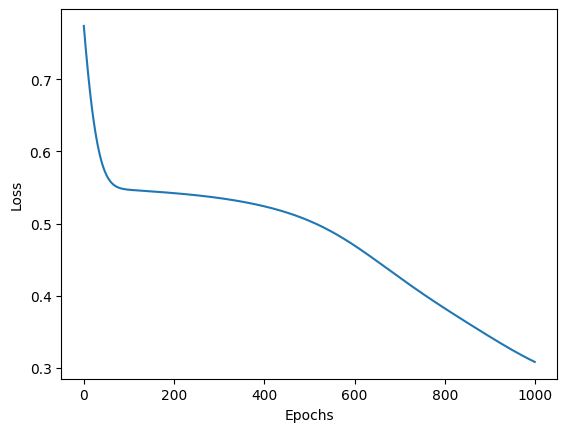

Training Losses are 
          0
0  0.652476
1  0.647454
2  0.642565
3  0.637811
4  0.633192
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 16
[[2904  140]
 [ 336  620]]
Accuracy: 0.8810, Precision: 0.8158, Recall: 0.6485, F1-score: 0.7226

Test Data
Confusion Matrix for hiden layer 16 and 32 and 16
[[2882  162]
 [ 317  639]]
Accuracy: 0.8802, Precision: 0.7978, Recall: 0.6684, F1-score: 0.7274



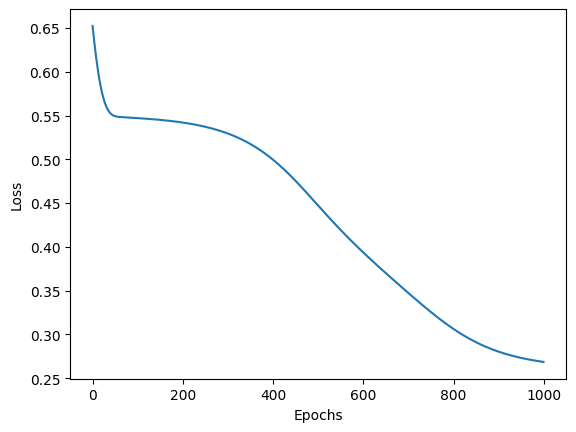

Training Losses are 
          0
0  0.847642
1  0.838384
2  0.829280
3  0.820333
4  0.811545
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 32
[[2978   66]
 [ 609  347]]
Accuracy: 0.8313, Precision: 0.8402, Recall: 0.3630, F1-score: 0.5069

Test Data
Confusion Matrix for hiden layer 16 and 32 and 32
[[2988   56]
 [ 609  347]]
Accuracy: 0.8337, Precision: 0.8610, Recall: 0.3630, F1-score: 0.5107



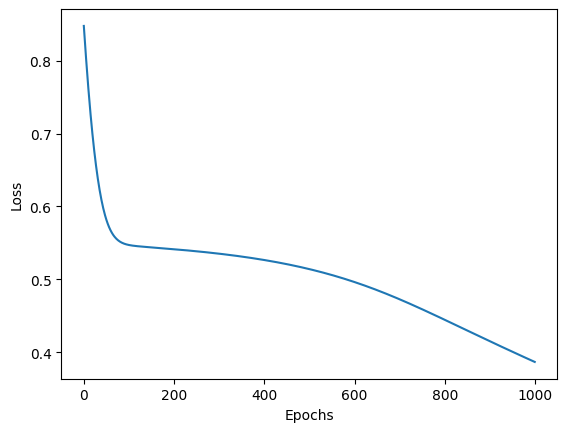

Training Losses are 
          0
0  0.681490
1  0.675881
2  0.670408
3  0.665073
4  0.659879
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 64
[[2925  119]
 [ 365  591]]
Accuracy: 0.8790, Precision: 0.8324, Recall: 0.6182, F1-score: 0.7095

Test Data
Confusion Matrix for hiden layer 16 and 32 and 64
[[2901  143]
 [ 338  618]]
Accuracy: 0.8798, Precision: 0.8121, Recall: 0.6464, F1-score: 0.7199



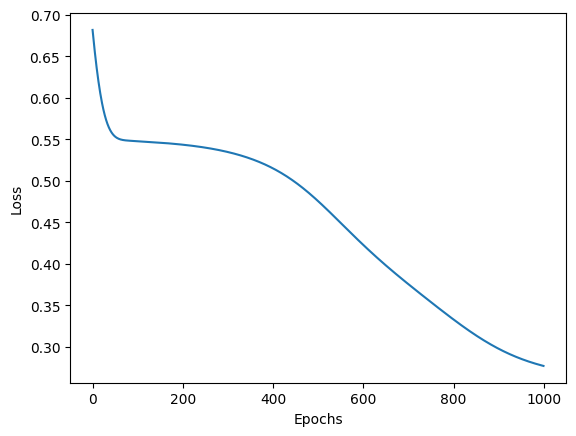

Training Losses are 
          0
0  0.775647
1  0.761819
2  0.748455
3  0.735563
4  0.723151
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 8
[[2903  141]
 [ 337  619]]
Accuracy: 0.8805, Precision: 0.8145, Recall: 0.6475, F1-score: 0.7214

Test Data
Confusion Matrix for hiden layer 16 and 64 and 8
[[2877  167]
 [ 315  641]]
Accuracy: 0.8795, Precision: 0.7933, Recall: 0.6705, F1-score: 0.7268



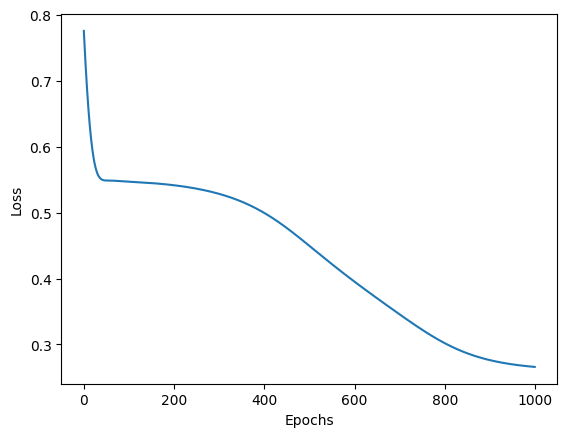

Training Losses are 
          0
0  0.632305
1  0.624710
2  0.617509
3  0.610705
4  0.604301
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 16
[[2874  170]
 [ 315  641]]
Accuracy: 0.8788, Precision: 0.7904, Recall: 0.6705, F1-score: 0.7255

Test Data
Confusion Matrix for hiden layer 16 and 64 and 16
[[2855  189]
 [ 295  661]]
Accuracy: 0.8790, Precision: 0.7776, Recall: 0.6914, F1-score: 0.7320



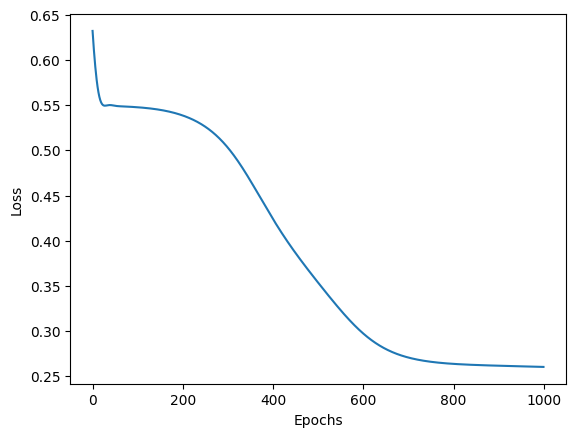

Training Losses are 
          0
0  0.714853
1  0.703203
2  0.692012
3  0.681287
4  0.671034
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 32
[[2897  147]
 [ 330  626]]
Accuracy: 0.8808, Precision: 0.8098, Recall: 0.6548, F1-score: 0.7241

Test Data
Confusion Matrix for hiden layer 16 and 64 and 32
[[2869  175]
 [ 309  647]]
Accuracy: 0.8790, Precision: 0.7871, Recall: 0.6768, F1-score: 0.7278



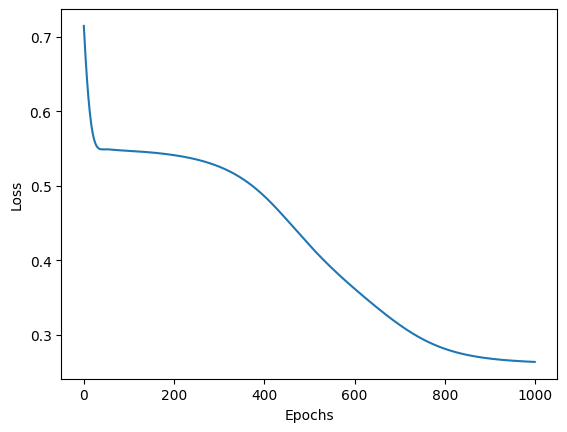

Training Losses are 
          0
0  0.675232
1  0.665353
2  0.655911
3  0.646913
4  0.638363
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 64
[[2889  155]
 [ 323  633]]
Accuracy: 0.8805, Precision: 0.8033, Recall: 0.6621, F1-score: 0.7259

Test Data
Confusion Matrix for hiden layer 16 and 64 and 64
[[2866  178]
 [ 298  658]]
Accuracy: 0.8810, Precision: 0.7871, Recall: 0.6883, F1-score: 0.7344



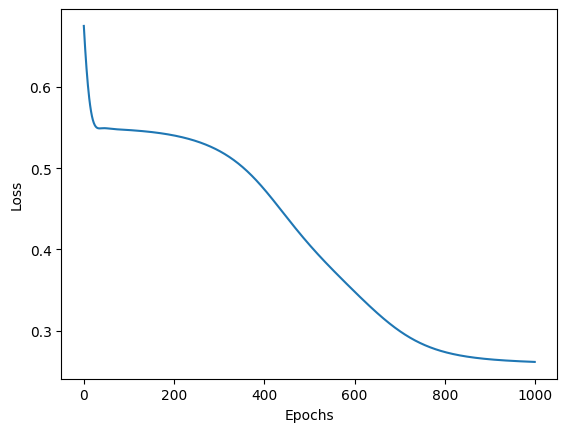

Training Losses are 
          0
0  0.869620
1  0.865440
2  0.861302
3  0.857205
4  0.853148
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 8 and 8
[[3044    0]
 [ 955    1]]
Accuracy: 0.7612, Precision: 1.0000, Recall: 0.0010, F1-score: 0.0021



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


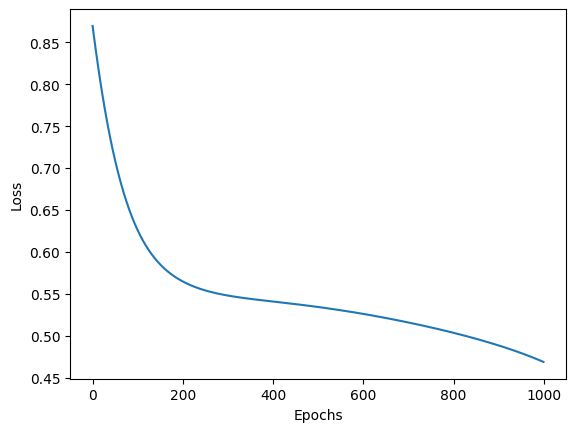

Training Losses are 
          0
0  0.747720
1  0.744556
2  0.741432
3  0.738348
4  0.735305
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 16
[[2990   54]
 [ 594  362]]
Accuracy: 0.8380, Precision: 0.8702, Recall: 0.3787, F1-score: 0.5277

Test Data
Confusion Matrix for hiden layer 32 and 8 and 16
[[2998   46]
 [ 581  375]]
Accuracy: 0.8433, Precision: 0.8907, Recall: 0.3923, F1-score: 0.5447



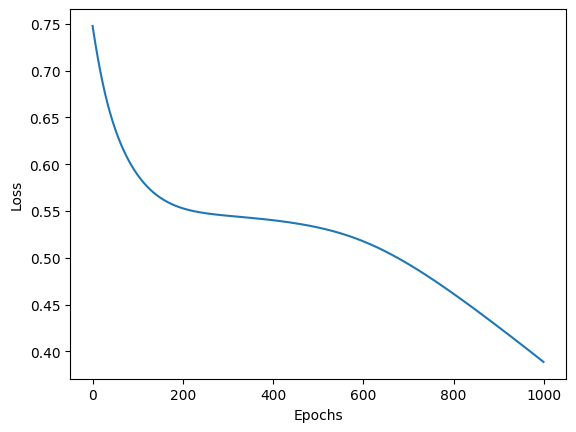

Training Losses are 
          0
0  0.714173
1  0.710907
2  0.707679
3  0.704488
4  0.701337
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 32
[[2970   74]
 [ 550  406]]
Accuracy: 0.8440, Precision: 0.8458, Recall: 0.4247, F1-score: 0.5655

Test Data
Confusion Matrix for hiden layer 32 and 8 and 32
[[2972   72]
 [ 545  411]]
Accuracy: 0.8458, Precision: 0.8509, Recall: 0.4299, F1-score: 0.5712



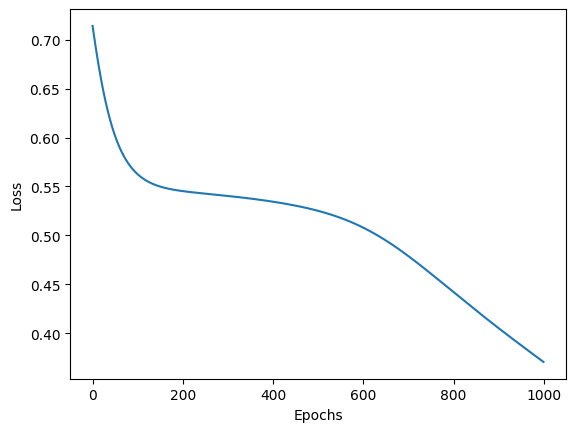

Training Losses are 
          0
0  0.836051
1  0.831884
2  0.827754
3  0.823663
4  0.819612
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 64
[[3039    5]
 [ 840  116]]
Accuracy: 0.7887, Precision: 0.9587, Recall: 0.1213, F1-score: 0.2154

Test Data
Confusion Matrix for hiden layer 32 and 8 and 64
[[3036    8]
 [ 830  126]]
Accuracy: 0.7905, Precision: 0.9403, Recall: 0.1318, F1-score: 0.2312



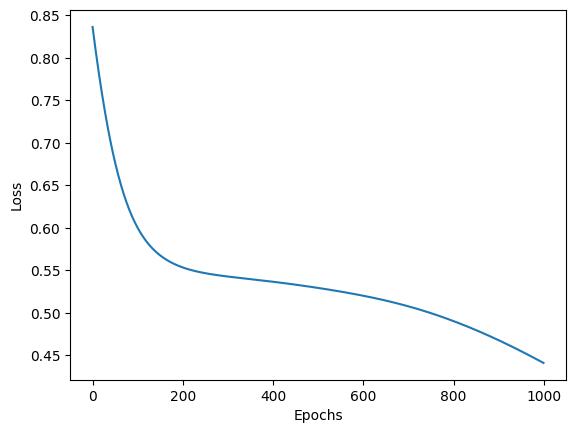

Training Losses are 
          0
0  0.692429
1  0.687894
2  0.683437
3  0.679061
4  0.674767
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 8
[[2923  121]
 [ 367  589]]
Accuracy: 0.8780, Precision: 0.8296, Recall: 0.6161, F1-score: 0.7071

Test Data
Confusion Matrix for hiden layer 32 and 16 and 8
[[2901  143]
 [ 336  620]]
Accuracy: 0.8802, Precision: 0.8126, Recall: 0.6485, F1-score: 0.7213



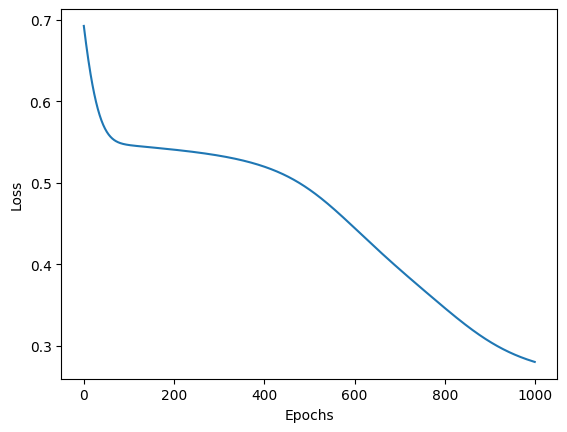

Training Losses are 
          0
0  0.755700
1  0.750548
2  0.745471
3  0.740470
4  0.735547
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 16
[[2948   96]
 [ 429  527]]
Accuracy: 0.8688, Precision: 0.8459, Recall: 0.5513, F1-score: 0.6675

Test Data
Confusion Matrix for hiden layer 32 and 16 and 16
[[2943  101]
 [ 402  554]]
Accuracy: 0.8742, Precision: 0.8458, Recall: 0.5795, F1-score: 0.6878



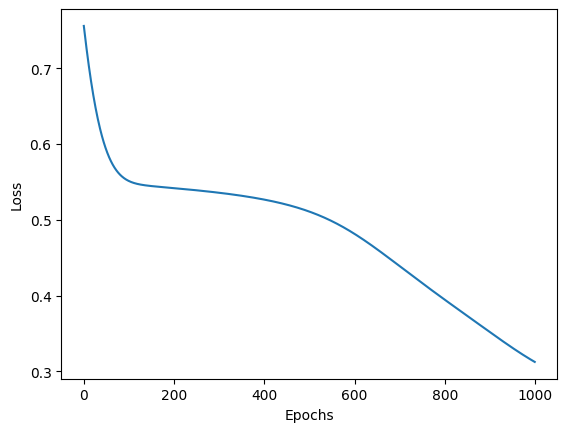

Training Losses are 
          0
0  0.791874
1  0.786431
2  0.781068
3  0.775788
4  0.770590
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 32
[[2959   85]
 [ 498  458]]
Accuracy: 0.8542, Precision: 0.8435, Recall: 0.4791, F1-score: 0.6111

Test Data
Confusion Matrix for hiden layer 32 and 16 and 32
[[2957   87]
 [ 473  483]]
Accuracy: 0.8600, Precision: 0.8474, Recall: 0.5052, F1-score: 0.6330



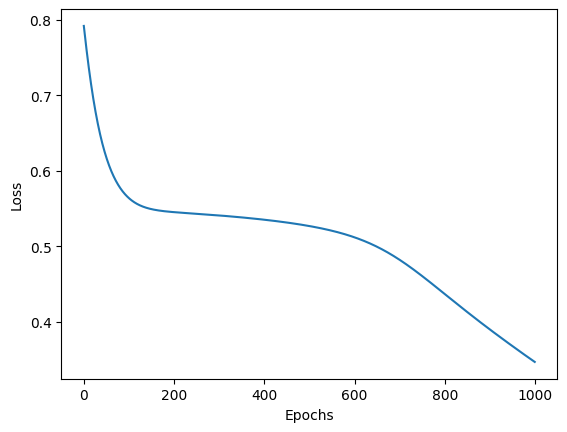

Training Losses are 
          0
0  0.619273
1  0.616442
2  0.613672
3  0.610966
4  0.608323
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 64
[[2884  160]
 [ 322  634]]
Accuracy: 0.8795, Precision: 0.7985, Recall: 0.6632, F1-score: 0.7246

Test Data
Confusion Matrix for hiden layer 32 and 16 and 64
[[2862  182]
 [ 296  660]]
Accuracy: 0.8805, Precision: 0.7838, Recall: 0.6904, F1-score: 0.7341



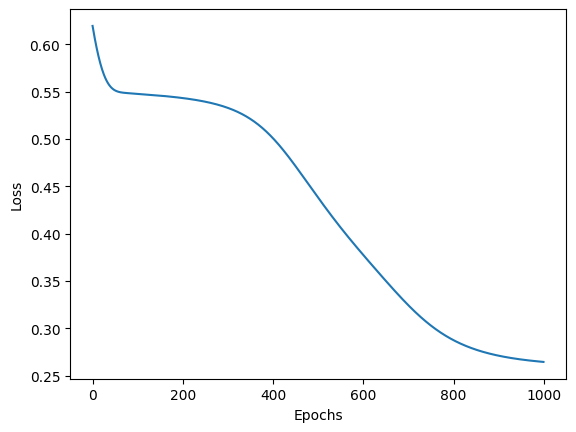

Training Losses are 
          0
0  0.676271
1  0.669483
2  0.662900
3  0.656524
4  0.650356
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 8
[[2886  158]
 [ 321  635]]
Accuracy: 0.8802, Precision: 0.8008, Recall: 0.6642, F1-score: 0.7261

Test Data
Confusion Matrix for hiden layer 32 and 32 and 8
[[2865  179]
 [ 304  652]]
Accuracy: 0.8792, Precision: 0.7846, Recall: 0.6820, F1-score: 0.7297



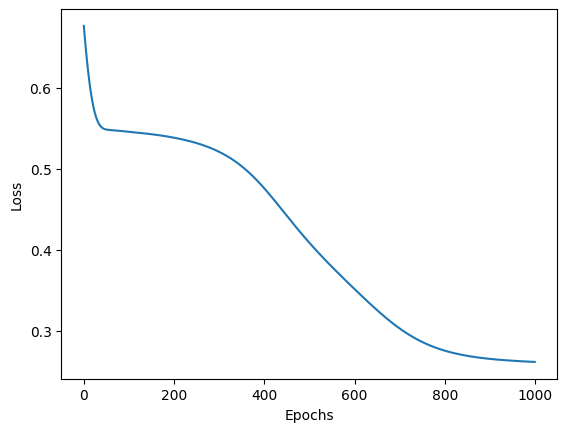

Training Losses are 
          0
0  0.833237
1  0.822441
2  0.811877
3  0.801548
4  0.791459
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 16
[[2940  104]
 [ 400  556]]
Accuracy: 0.8740, Precision: 0.8424, Recall: 0.5816, F1-score: 0.6881

Test Data
Confusion Matrix for hiden layer 32 and 32 and 16
[[2928  116]
 [ 377  579]]
Accuracy: 0.8768, Precision: 0.8331, Recall: 0.6056, F1-score: 0.7014



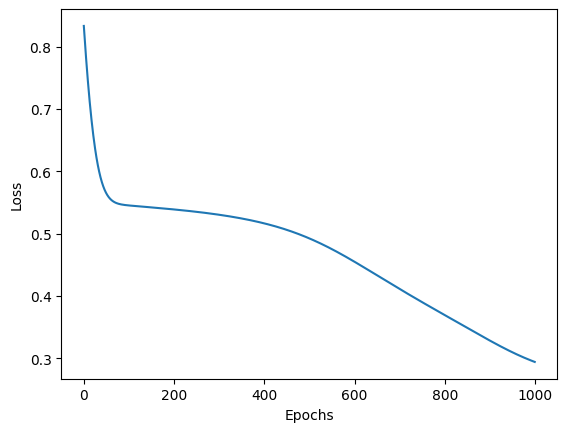

Training Losses are 
          0
0  0.662711
1  0.656275
2  0.650027
3  0.643970
4  0.638110
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 32
[[2874  170]
 [ 313  643]]
Accuracy: 0.8792, Precision: 0.7909, Recall: 0.6726, F1-score: 0.7270

Test Data
Confusion Matrix for hiden layer 32 and 32 and 32
[[2854  190]
 [ 289  667]]
Accuracy: 0.8802, Precision: 0.7783, Recall: 0.6977, F1-score: 0.7358



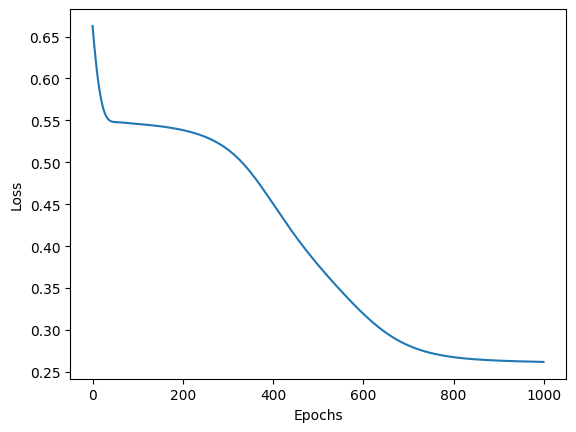

Training Losses are 
          0
0  0.729585
1  0.721184
2  0.712998
3  0.705029
4  0.697282
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 64
[[2904  140]
 [ 337  619]]
Accuracy: 0.8808, Precision: 0.8155, Recall: 0.6475, F1-score: 0.7219

Test Data
Confusion Matrix for hiden layer 32 and 32 and 64
[[2879  165]
 [ 313  643]]
Accuracy: 0.8805, Precision: 0.7958, Recall: 0.6726, F1-score: 0.7290



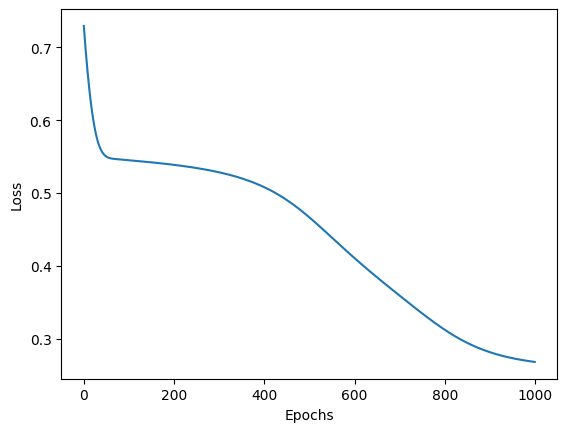

Training Losses are 
          0
0  0.610628
1  0.602927
2  0.595789
3  0.589218
4  0.583212
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 8
[[2870  174]
 [ 313  643]]
Accuracy: 0.8782, Precision: 0.7870, Recall: 0.6726, F1-score: 0.7253

Test Data
Confusion Matrix for hiden layer 32 and 64 and 8
[[2856  188]
 [ 297  659]]
Accuracy: 0.8788, Precision: 0.7780, Recall: 0.6893, F1-score: 0.7310



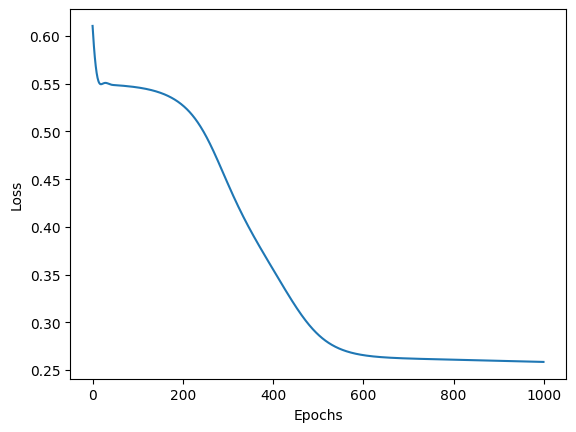

Training Losses are 
          0
0  0.609138
1  0.601199
2  0.593875
3  0.587170
4  0.581082
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 16
[[2874  170]
 [ 311  645]]
Accuracy: 0.8798, Precision: 0.7914, Recall: 0.6747, F1-score: 0.7284

Test Data
Confusion Matrix for hiden layer 32 and 64 and 16
[[2857  187]
 [ 298  658]]
Accuracy: 0.8788, Precision: 0.7787, Recall: 0.6883, F1-score: 0.7307



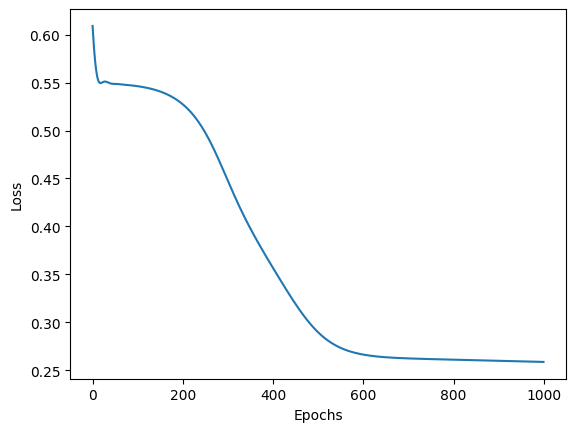

Training Losses are 
          0
0  0.685472
1  0.673093
2  0.661357
3  0.650271
4  0.639840
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 32
[[2882  162]
 [ 314  642]]
Accuracy: 0.8810, Precision: 0.7985, Recall: 0.6715, F1-score: 0.7295

Test Data
Confusion Matrix for hiden layer 32 and 64 and 32
[[2859  185]
 [ 298  658]]
Accuracy: 0.8792, Precision: 0.7805, Recall: 0.6883, F1-score: 0.7315



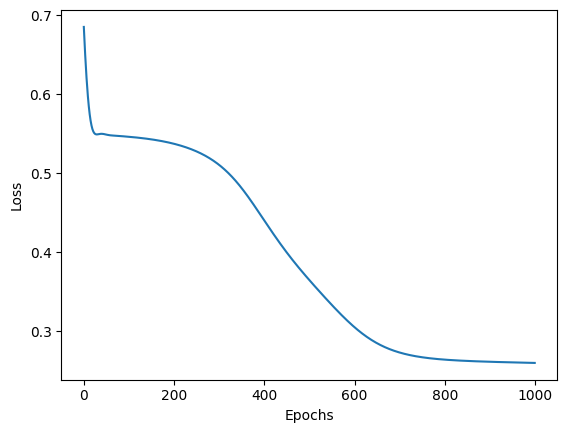

Training Losses are 
          0
0  0.696454
1  0.683600
2  0.671370
3  0.659775
4  0.648823
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 64
[[2875  169]
 [ 314  642]]
Accuracy: 0.8792, Precision: 0.7916, Recall: 0.6715, F1-score: 0.7267

Test Data
Confusion Matrix for hiden layer 32 and 64 and 64
[[2858  186]
 [ 298  658]]
Accuracy: 0.8790, Precision: 0.7796, Recall: 0.6883, F1-score: 0.7311



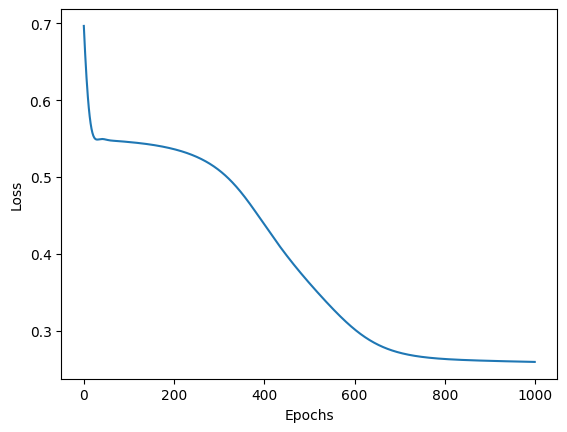

Training Losses are 
          0
0  0.766980
1  0.761376
2  0.755863
3  0.750444
4  0.745121
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 8
[[2952   92]
 [ 446  510]]
Accuracy: 0.8655, Precision: 0.8472, Recall: 0.5335, F1-score: 0.6547

Test Data
Confusion Matrix for hiden layer 64 and 8 and 8
[[2942  102]
 [ 417  539]]
Accuracy: 0.8702, Precision: 0.8409, Recall: 0.5638, F1-score: 0.6750



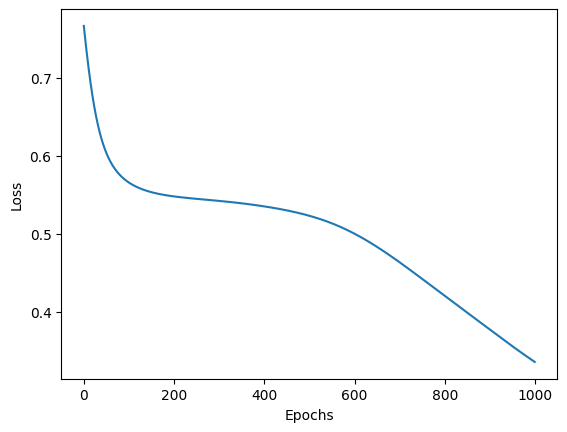

Training Losses are 
          0
0  0.961470
1  0.955304
2  0.949228
3  0.943247
4  0.937361
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 16
[[2997   47]
 [ 540  416]]
Accuracy: 0.8532, Precision: 0.8985, Recall: 0.4351, F1-score: 0.5863

Test Data
Confusion Matrix for hiden layer 64 and 8 and 16
[[2993   51]
 [ 537  419]]
Accuracy: 0.8530, Precision: 0.8915, Recall: 0.4383, F1-score: 0.5877



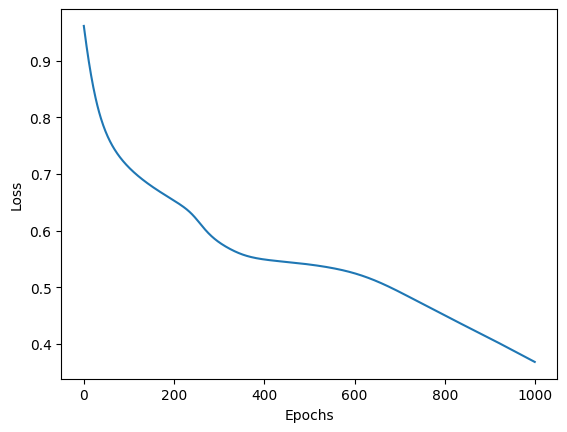

Training Losses are 
          0
0  0.683649
1  0.679354
2  0.675123
3  0.670960
4  0.666867
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 32
[[2908  136]
 [ 342  614]]
Accuracy: 0.8805, Precision: 0.8187, Recall: 0.6423, F1-score: 0.7198

Test Data
Confusion Matrix for hiden layer 64 and 8 and 32
[[2881  163]
 [ 315  641]]
Accuracy: 0.8805, Precision: 0.7973, Recall: 0.6705, F1-score: 0.7284



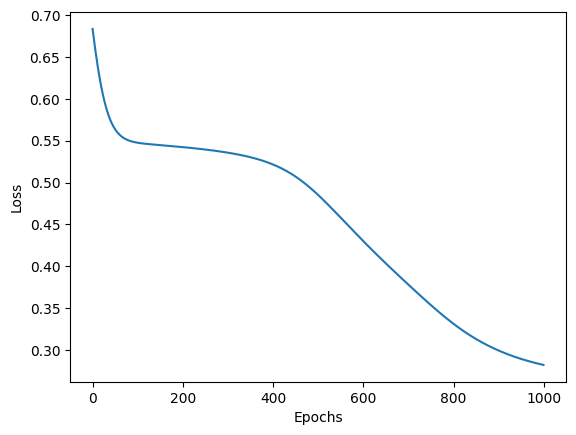

Training Losses are 
          0
0  0.778595
1  0.773077
2  0.767637
3  0.762277
4  0.757001
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 64
[[2957   87]
 [ 418  538]]
Accuracy: 0.8738, Precision: 0.8608, Recall: 0.5628, F1-score: 0.6806

Test Data
Confusion Matrix for hiden layer 64 and 8 and 64
[[2947   97]
 [ 403  553]]
Accuracy: 0.8750, Precision: 0.8508, Recall: 0.5785, F1-score: 0.6887



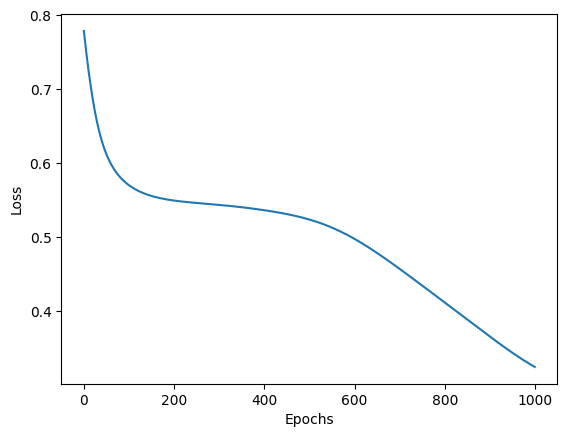

Training Losses are 
          0
0  0.833274
1  0.824108
2  0.815111
3  0.806290
4  0.797649
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 8
[[2913  131]
 [ 346  610]]
Accuracy: 0.8808, Precision: 0.8232, Recall: 0.6381, F1-score: 0.7189

Test Data
Confusion Matrix for hiden layer 64 and 16 and 8
[[2889  155]
 [ 322  634]]
Accuracy: 0.8808, Precision: 0.8035, Recall: 0.6632, F1-score: 0.7266



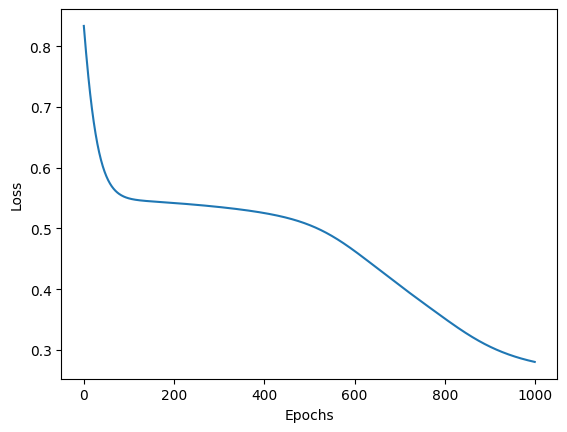

Training Losses are 
          0
0  0.667672
1  0.661205
2  0.654923
3  0.648834
4  0.642942
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 16
[[2873  171]
 [ 314  642]]
Accuracy: 0.8788, Precision: 0.7897, Recall: 0.6715, F1-score: 0.7258

Test Data
Confusion Matrix for hiden layer 64 and 16 and 16
[[2858  186]
 [ 294  662]]
Accuracy: 0.8800, Precision: 0.7807, Recall: 0.6925, F1-score: 0.7339



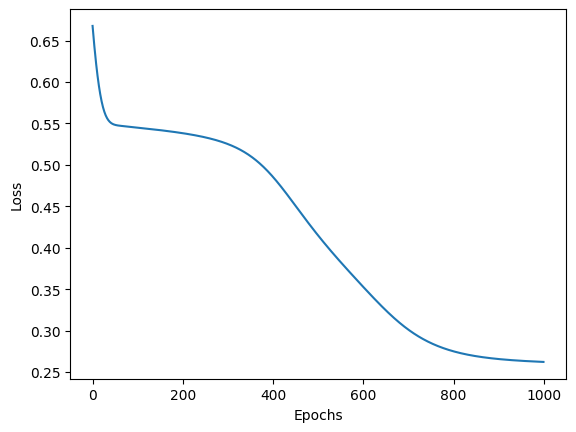

Training Losses are 
          0
0  0.633696
1  0.628047
2  0.622614
3  0.617400
4  0.612408
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 32
[[2871  173]
 [ 313  643]]
Accuracy: 0.8785, Precision: 0.7880, Recall: 0.6726, F1-score: 0.7257

Test Data
Confusion Matrix for hiden layer 64 and 16 and 32
[[2850  194]
 [ 289  667]]
Accuracy: 0.8792, Precision: 0.7747, Recall: 0.6977, F1-score: 0.7342



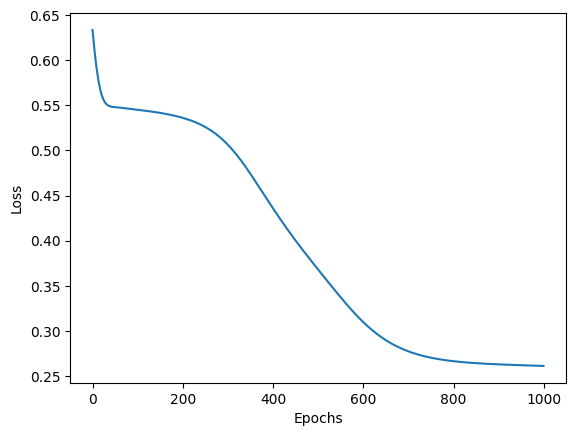

Training Losses are 
          0
0  0.840693
1  0.831198
2  0.821902
3  0.812810
4  0.803926
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 64
[[2924  120]
 [ 367  589]]
Accuracy: 0.8782, Precision: 0.8307, Recall: 0.6161, F1-score: 0.7075

Test Data
Confusion Matrix for hiden layer 64 and 16 and 64
[[2902  142]
 [ 333  623]]
Accuracy: 0.8812, Precision: 0.8144, Recall: 0.6517, F1-score: 0.7240



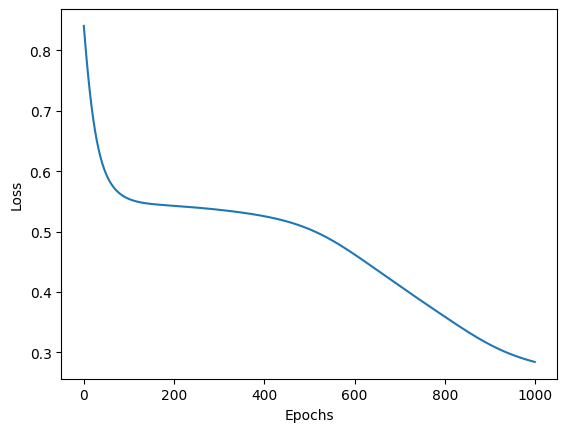

Training Losses are 
          0
0  0.744349
1  0.731805
2  0.719709
3  0.708072
4  0.696903
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 8
[[2877  167]
 [ 315  641]]
Accuracy: 0.8795, Precision: 0.7933, Recall: 0.6705, F1-score: 0.7268

Test Data
Confusion Matrix for hiden layer 64 and 32 and 8
[[2854  190]
 [ 294  662]]
Accuracy: 0.8790, Precision: 0.7770, Recall: 0.6925, F1-score: 0.7323



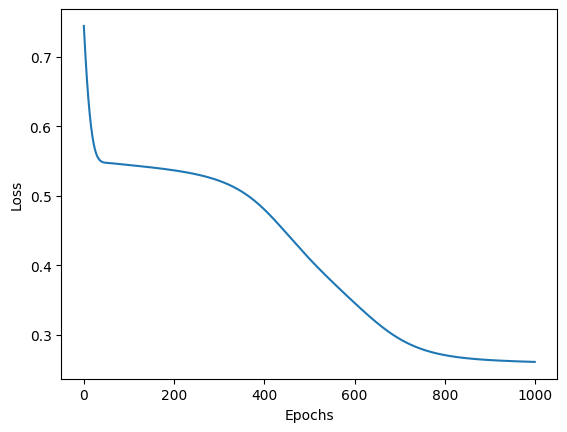

Training Losses are 
          0
0  0.733750
1  0.722435
2  0.711535
3  0.701058
4  0.691007
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 16
[[2870  174]
 [ 313  643]]
Accuracy: 0.8782, Precision: 0.7870, Recall: 0.6726, F1-score: 0.7253

Test Data
Confusion Matrix for hiden layer 64 and 32 and 16
[[2851  193]
 [ 287  669]]
Accuracy: 0.8800, Precision: 0.7761, Recall: 0.6998, F1-score: 0.7360



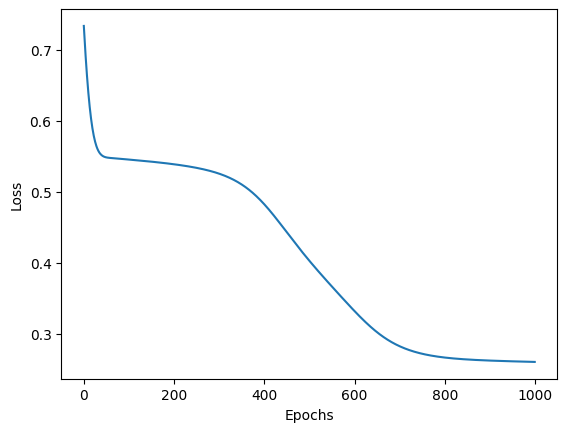

Training Losses are 
          0
0  0.596922
1  0.591441
2  0.586312
3  0.581539
4  0.577122
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 32
[[2868  176]
 [ 310  646]]
Accuracy: 0.8785, Precision: 0.7859, Recall: 0.6757, F1-score: 0.7267

Test Data
Confusion Matrix for hiden layer 64 and 32 and 32
[[2849  195]
 [ 286  670]]
Accuracy: 0.8798, Precision: 0.7746, Recall: 0.7008, F1-score: 0.7359



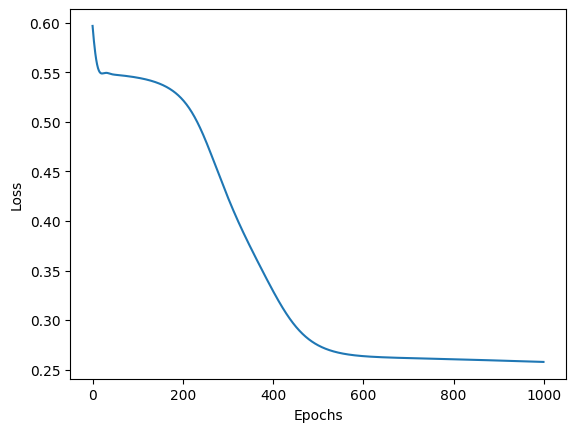

Training Losses are 
          0
0  0.626990
1  0.619507
2  0.612428
3  0.605758
4  0.599503
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 64
[[2866  178]
 [ 312  644]]
Accuracy: 0.8775, Precision: 0.7835, Recall: 0.6736, F1-score: 0.7244

Test Data
Confusion Matrix for hiden layer 64 and 32 and 64
[[2846  198]
 [ 288  668]]
Accuracy: 0.8785, Precision: 0.7714, Recall: 0.6987, F1-score: 0.7333



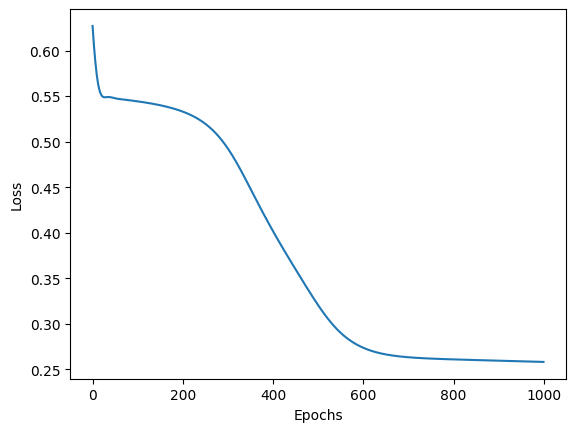

Training Losses are 
          0
0  0.886131
1  0.860575
2  0.836155
3  0.812892
4  0.790803
Validation Data
Confusion Matrix for hidden layer 64 and 64 and 8
[[2886  158]
 [ 321  635]]
Accuracy: 0.8802, Precision: 0.8008, Recall: 0.6642, F1-score: 0.7261

Test Data
Confusion Matrix for hiden layer 64 and 64 and 8
[[2864  180]
 [ 296  660]]
Accuracy: 0.8810, Precision: 0.7857, Recall: 0.6904, F1-score: 0.7350



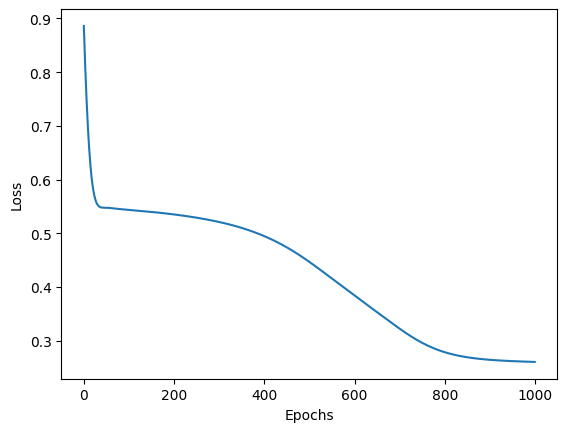

Training Losses are 
          0
0  0.624800
1  0.613584
2  0.603364
3  0.594145
4  0.585920
Validation Data
Confusion Matrix for hidden layer 64 and 64 and 16
[[2869  175]
 [ 314  642]]
Accuracy: 0.8778, Precision: 0.7858, Recall: 0.6715, F1-score: 0.7242

Test Data
Confusion Matrix for hiden layer 64 and 64 and 16
[[2851  193]
 [ 295  661]]
Accuracy: 0.8780, Precision: 0.7740, Recall: 0.6914, F1-score: 0.7304



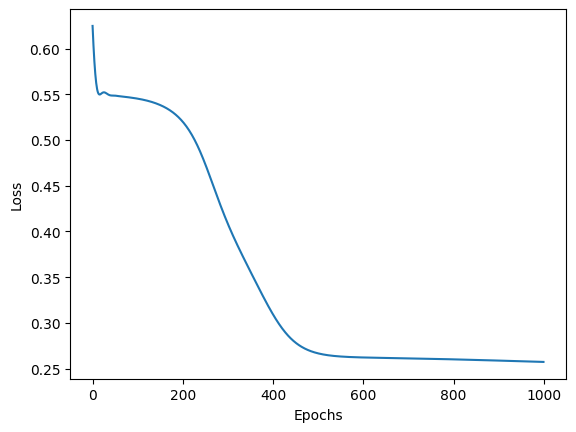

Training Losses are 
          0
0  0.676142
1  0.660620
2  0.646204
3  0.632905
4  0.620725
Validation Data
Confusion Matrix for hidden layer 64 and 64 and 32
[[2869  175]
 [ 314  642]]
Accuracy: 0.8778, Precision: 0.7858, Recall: 0.6715, F1-score: 0.7242

Test Data
Confusion Matrix for hiden layer 64 and 64 and 32
[[2850  194]
 [ 294  662]]
Accuracy: 0.8780, Precision: 0.7734, Recall: 0.6925, F1-score: 0.7307



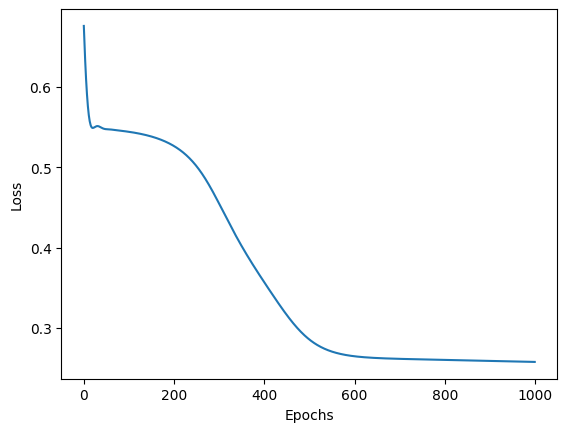

Training Losses are 
          0
0  0.626302
1  0.614926
2  0.604554
3  0.595188
4  0.586820
Validation Data
Confusion Matrix for hidden layer 64 and 64 and 64
[[2870  174]
 [ 313  643]]
Accuracy: 0.8782, Precision: 0.7870, Recall: 0.6726, F1-score: 0.7253

Test Data
Confusion Matrix for hiden layer 64 and 64 and 64
[[2851  193]
 [ 295  661]]
Accuracy: 0.8780, Precision: 0.7740, Recall: 0.6914, F1-score: 0.7304



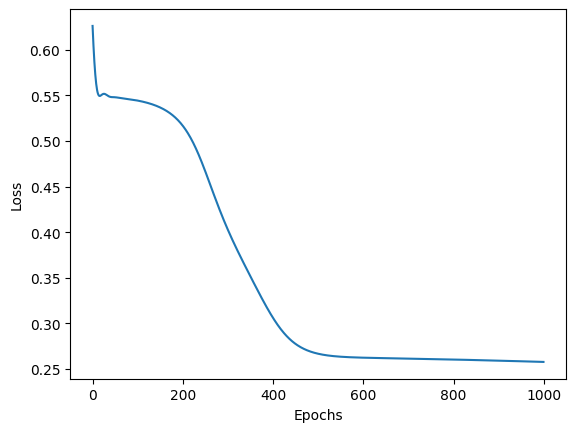

The best accuracy on test data is 0.88125 for layers 64 , 16, 64


In [18]:
nuerons = [8,16,32,64]
best_score=0
layer1=0
layer2=0
layer3=0
for nueron in nuerons:
  for double_nueron in nuerons:
    for triple_nueron in nuerons:
      model = DoubleLayer(20,nueron,double_nueron)
      criterion = nn.BCELoss() #Binary Classifiaction Loss
      optimizer = optim.Adam(model.parameters(), lr=0.001)
      epochs=1000
      loss_arr=[]
      for i in range(epochs):
            optimizer.zero_grad()
            model.train()
            outputs=model(X_train)
            outputs = outputs.view(-1, 1)
            loss = criterion(outputs, y_train.float())
            loss_arr.append(loss.detach().numpy())
            loss.backward()
            optimizer.step()
      print("Training Losses are ")
      loss_df = pd.DataFrame(loss_arr)
      print(loss_df.head())
      y_val_pred=model(X_val)
      y_val_pred=(y_val_pred>0.5).float()
      cm = confusion_matrix(y_val, y_val_pred)
      acc = accuracy_score(y_val, y_val_pred)
      precision = precision_score(y_val.numpy(), y_val_pred.numpy())
      recall = recall_score(y_val.numpy(), y_val_pred.numpy())
      f1 = f1_score(y_val.numpy(), y_val_pred.numpy())
      print("Validation Data")
      print(f"Confusion Matrix for hidden layer {nueron} and {double_nueron} and {triple_nueron}")
      print(cm)
      print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
      y_test_pred=model(X_test)
      y_test_pred=(y_test_pred>0.5).float()
      cm = confusion_matrix(y_test, y_test_pred)
      acc = accuracy_score(y_test, y_test_pred)
      if acc > best_score:
          best_score=acc
          layer1=nueron
          layer2=double_nueron
          layer3=triple_nueron
      precision = precision_score(y_test.numpy(), y_test_pred.numpy())
      recall = recall_score(y_test.numpy(), y_test_pred.numpy())
      f1 = f1_score(y_test.numpy(), y_test_pred.numpy())
      print("Test Data")
      print(f"Confusion Matrix for hiden layer {nueron} and {double_nueron} and {triple_nueron}")
      print(cm)
      print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
      plt.plot(range(epochs), loss_arr)
      plt.xlabel('Epochs')
      plt.ylabel('Loss')
      plt.show()
print(f"The best accuracy on test data is {best_score} for layers {layer1} , {layer2}, {layer3}")